In [3]:
# Load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from distfit import distfit

In [4]:
# Load the dataset

df = pd.read_csv('sloth_data.csv')
df.head()

Unnamed: 0  claw_length_cm             endangered  size_cm      specie  \
0           0           6.825  critically_endangered   52.004  three_toed   
1           1           8.260  critically_endangered   50.082  three_toed   
2           2           8.662  critically_endangered   51.498  three_toed   
3           3           8.467  critically_endangered   50.122  three_toed   
4           4           7.104  critically_endangered   51.364  three_toed   

               sub_specie  tail_length_cm  weight_kg  
0  Pygmy three-toed sloth           4.448      3.570  
1  Pygmy three-toed sloth           6.286      2.844  
2  Pygmy three-toed sloth           4.551      1.259  
3  Pygmy three-toed sloth           6.983      2.392  
4  Pygmy three-toed sloth           5.411      3.163

In [5]:
# Drop the Unnamed: 0 column (same that index)

df = df.drop('Unnamed: 0', axis=1)

In [6]:
# Distinguish type values

df.dtypes.value_counts()

float64    4
object     3
Name: count, dtype: int64

In [7]:
# Looking for NaN values 

df.isnull().any()

claw_length_cm    False
endangered        False
size_cm           False
specie            False
sub_specie        False
tail_length_cm    False
weight_kg         False
dtype: bool

In [8]:
# Some statistics values

df.describe(include='all')

claw_length_cm     endangered      size_cm      specie  \
count      5000.000000           5000  5000.000000        5000   
unique             NaN              3          NaN           2   
top                NaN  least_concern          NaN  three_toed   
freq               NaN           4390          NaN        2662   
mean          7.423503            NaN    60.399852         NaN   
std           1.520533            NaN     5.929968         NaN   
min           1.748000            NaN    46.928000         NaN   
25%           6.383750            NaN    59.904750         NaN   
50%           7.445000            NaN    62.478500         NaN   
75%           8.491500            NaN    64.398250         NaN   
max          12.171000            NaN    68.760000         NaN   

                      sub_specie  tail_length_cm    weight_kg  
count                       5000     5000.000000  5000.000000  
unique                         6             NaN          NaN  
top     Hoffman’s two-toed sloth             NaN          NaN  
freq                        1198             NaN          NaN  
mean                         NaN        3.410544     5.253253  
std                          NaN        2.333288     1.268203  
min                          NaN       -2.942000     0.946000  
25%                          NaN        1.440250     4.382500  
50%                          NaN        3.812000     5.274000  
75%                          NaN        5.351250     6.125250  
max                          NaN        8.538000     9.997000

Celd above shows that the min value on the tail_length_cm is a negative, which does not make any sense. Also, there are some really small values (around 0.01-0.09 cm) which could be because 
there is no way to know if that register is related to a young sloth or one that were bitted by a depredador. In any case, those values might be seen has outliers with boxplots. 

In [9]:
# To deal with those negative values, we calculate the absolute value of these negative values, because could be possible that the negative was a mistake creating the data, and we 
# are going to drop the tail length values that are less than 0.2.
# For sure this is an arbitrary decision, One can do the analysis with all the data or put a different fix point to drop some unwanted data.
df[np.abs(df['tail_length_cm'])<=0.2]

claw_length_cm     endangered  size_cm    specie  \
2664           9.574  least_concern   65.167  two_toed   
2671           7.024  least_concern   65.752  two_toed   
2673           8.361  least_concern   65.435  two_toed   
2678           8.595  least_concern   66.694  two_toed   
2679           6.937  least_concern   65.334  two_toed   
...              ...            ...      ...       ...   
4582           5.427  least_concern   62.940  two_toed   
4709           5.628  least_concern   64.609  two_toed   
4717           4.840  least_concern   63.832  two_toed   
4850           5.741  least_concern   64.177  two_toed   
4939           5.447  least_concern   64.348  two_toed   

                     sub_specie  tail_length_cm  weight_kg  
2664  Linnaeus’s two-toed sloth          -0.030      6.125  
2671  Linnaeus’s two-toed sloth           0.135      5.131  
2673  Linnaeus’s two-toed sloth          -0.100      6.282  
2678  Linnaeus’s two-toed sloth           0.183      7.070  
2679  Linnaeus’s two-toed sloth           0.096      6.671  
...                         ...             ...        ...  
4582   Hoffman’s two-toed sloth           0.198      4.378  
4709   Hoffman’s two-toed sloth           0.071      6.018  
4717   Hoffman’s two-toed sloth           0.093      6.213  
4850   Hoffman’s two-toed sloth           0.118      6.055  
4939   Hoffman’s two-toed sloth           0.069      6.878  

[184 rows x 7 columns]

In [10]:
# Droping the values above and set new index

indextoDrop = df[np.abs(df['tail_length_cm'])<=0.2].index
df = df.drop(indextoDrop,axis=0)
df = df.reset_index()
df = df.drop('index',axis=1)
df['tail_length_cm'] = np.abs(df['tail_length_cm'])

In [11]:
# Checking there is no negative value

df.describe(include='all')

claw_length_cm     endangered      size_cm      specie  \
count      4816.000000           4816  4816.000000        4816   
unique             NaN              3          NaN           2   
top                NaN  least_concern          NaN  three_toed   
freq               NaN           4206          NaN        2662   
mean          7.374385            NaN    60.196081         NaN   
std           1.502733            NaN     5.943529         NaN   
min           1.748000            NaN    46.928000         NaN   
25%           6.348750            NaN    59.572750         NaN   
50%           7.399500            NaN    62.326500         NaN   
75%           8.422250            NaN    64.150250         NaN   
max          12.171000            NaN    68.760000         NaN   

                      sub_specie  tail_length_cm    weight_kg  
count                       4816     4816.000000  4816.000000  
unique                         6             NaN          NaN  
top     Hoffman’s two-toed sloth             NaN          NaN  
freq                        1184             NaN          NaN  
mean                         NaN        3.667065     5.217161  
std                          NaN        2.068907     1.262434  
min                          NaN        0.201000     0.946000  
25%                          NaN        1.750000     4.352750  
50%                          NaN        3.987500     5.226000  
75%                          NaN        5.392250     6.082250  
max                          NaN        8.538000     9.997000

In [12]:
# Exploring object columns

df.describe(include='object')

endangered      specie                sub_specie
count            4816        4816                      4816
unique              3           2                         6
top     least_concern  three_toed  Hoffman’s two-toed sloth
freq             4206        2662                      1184

In [13]:
# Creating a function to convert all the object columns into categorical columns

def convertcolumnsOtoC(columns_toConvert,df):
    dict_objectcolumns = {}
    
    for i in range(0, len(columns_toConvert),1):
        dict_objectcolumns[columns_toConvert[i]] = 'category'

    df_changed = df.astype(
        dict_objectcolumns
    )
    return df_changed

df = convertcolumnsOtoC(df.describe(include='object').columns,df)
df.dtypes

claw_length_cm     float64
endangered        category
size_cm            float64
specie            category
sub_specie        category
tail_length_cm     float64
weight_kg          float64
dtype: object

After looking at the type columns and dealing with some missing values, we can continue with the EDA looking at some barplots, which data distribution fits well the data and if there is 
correlation between the variables. 

In [14]:
# Saving the numerical and categorical column names for the plotting 

numbercol_names = df.describe(include = np.number).columns
categorycol_names = df.describe(include = 'category').columns

Let's begin with the barplots of the categorical variables 

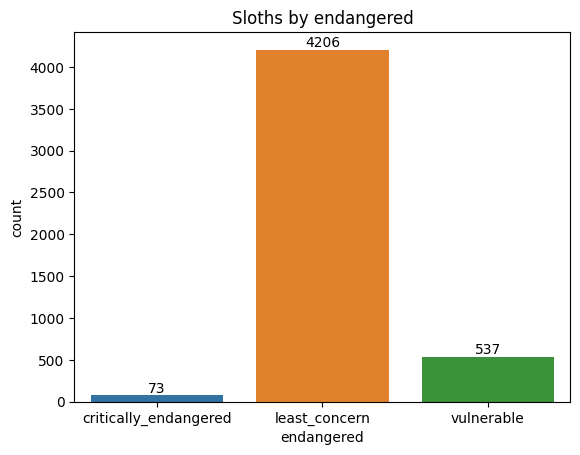

In [15]:
endangered_barplot = df.value_counts('endangered',sort=True).reset_index(name='count')
ax = sns.barplot(endangered_barplot, x="endangered", y="count")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_title('Sloths by endangered')
plt.show()



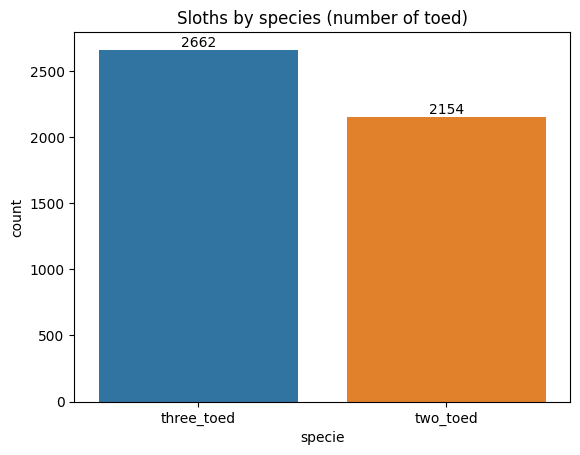

In [16]:
specie_barplot = df.value_counts('specie',sort=True).reset_index(name='count')
ax = sns.barplot(specie_barplot, x="specie", y="count")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_title('Sloths by species (number of toed)')
plt.show()

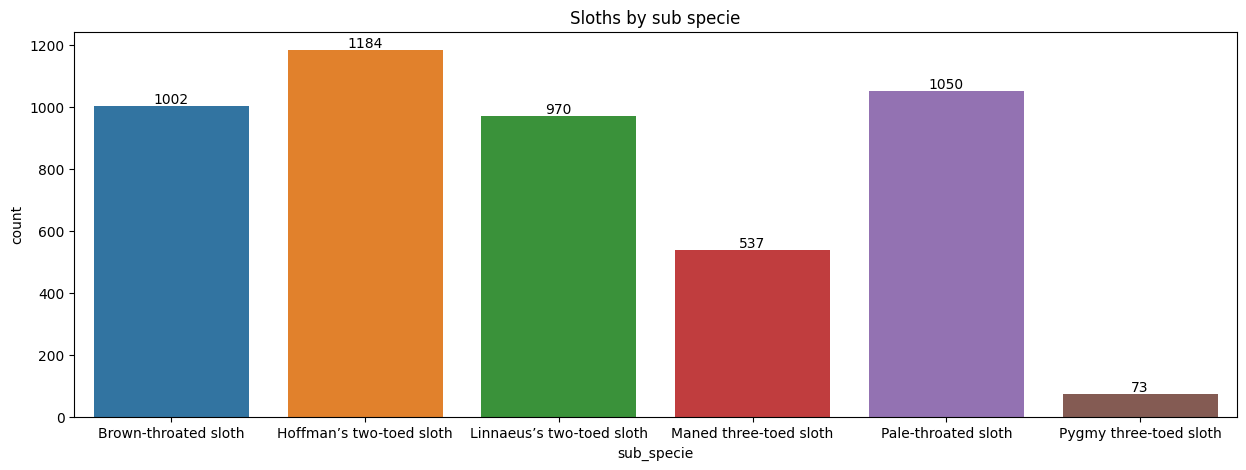

In [17]:
sub_specie_barplot = df.value_counts('sub_specie',sort=True).reset_index(name='count')
fig = plt.subplots(1,figsize=(15,5))
ax = sns.barplot(sub_specie_barplot, x="sub_specie", y="count")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_title('Sloths by sub specie')
plt.show()

In [18]:
# The endangered barplot shows that most of the lost are not in critically endangered or vulnerable. One interest thing to see here is if the critically endangered sloths belong to a specific
# sub specie and specie

df[df['endangered']=='critically_endangered']['sub_specie'].value_counts()

sub_specie
Pygmy three-toed sloth       73
Brown-throated sloth          0
Hoffman’s two-toed sloth      0
Linnaeus’s two-toed sloth     0
Maned three-toed sloth        0
Pale-throated sloth           0
Name: count, dtype: int64

If we take a look thorugh the results of the celds above, we can see that the total critically endangered sloths are the pygmy three-toed sloth, since the endangered's barplot show that 
73 sloths belong to this category and also the sub_species's barplot showed that there are 73 Pygmy three-toed sloth, and if we search for the critically endangered by sub specie, we find that 
all are Pygmy three-toed sloth. With this, let's see if the same situation ocurrs for the other endangered categories 

In [19]:
df[df['endangered']=='vulnerable']['sub_specie'].value_counts()

sub_specie
Maned three-toed sloth       537
Brown-throated sloth           0
Hoffman’s two-toed sloth       0
Linnaeus’s two-toed sloth      0
Pale-throated sloth            0
Pygmy three-toed sloth         0
Name: count, dtype: int64

In [20]:
df[df['endangered']=='least_concern']['sub_specie'].value_counts()

sub_specie
Hoffman’s two-toed sloth     1184
Pale-throated sloth          1050
Brown-throated sloth         1002
Linnaeus’s two-toed sloth     970
Maned three-toed sloth          0
Pygmy three-toed sloth          0
Name: count, dtype: int64

From celds above, the same situation for the critically endangered sloths happend for the vulnerable sloths. Only the Maned three-toed sloth belong to this category. And there is a mix 
with the left sub species with the least concern category. 

Next thing to plot is the distribution of the data with a histogram and a boxplot, with the purpose of find if there is a distribution function that fits every data distribution and 
find if there are outliers in the data.

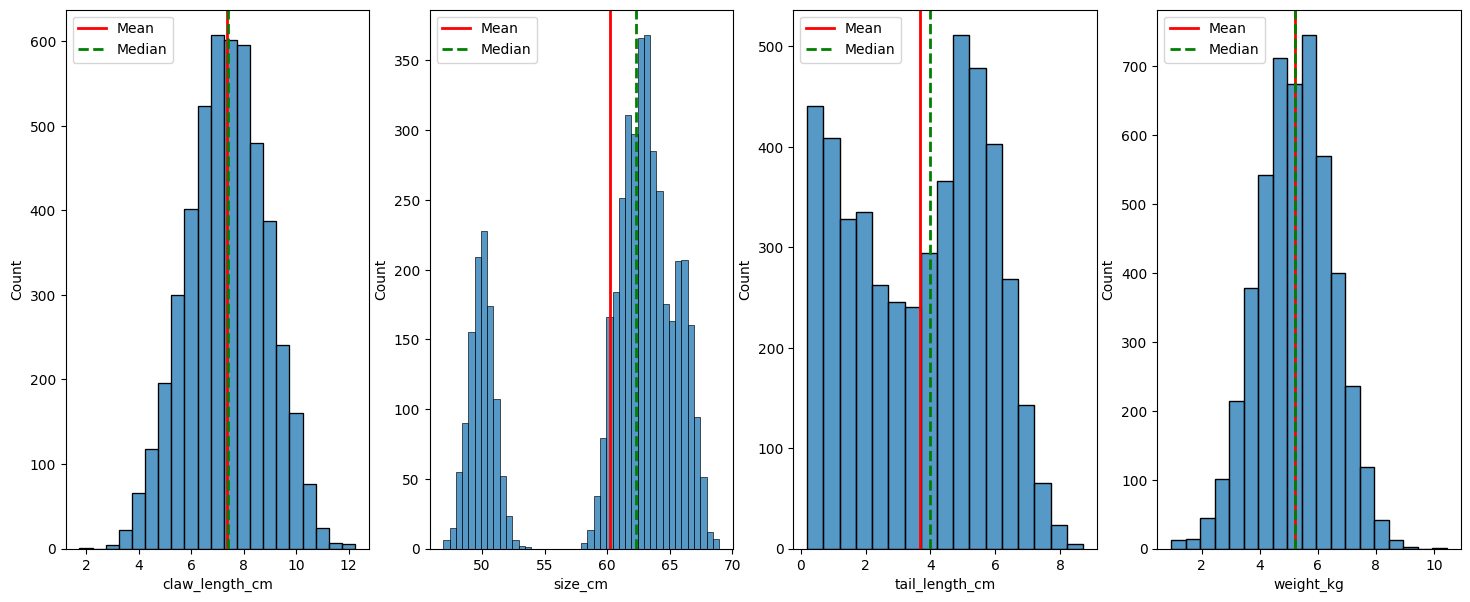

In [21]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (18,7))
i = 0
for names in numbercol_names:
    sns.histplot(data=df, x=names, ax=axs[i], binwidth=0.5)
    axs[i].axvline(x=df[names].mean(), color='red', linestyle='solid', linewidth=2, label= 'Mean')
    axs[i].axvline(x=df[names].median(), color='green', linestyle='dashed', linewidth=2, label= 'Median')
    
    axs[i].legend(loc='upper left')
    
    i+=1



The histogram plots of the numerical features shows that for the claw_length_cm and the weight_kg have almost the same value for the mean and median. This along with the data distribution 
could be associated with a normal distribution that fits the data distribution.  <br>
The size_cm histogram shows two peaks, one around 50cm and the other around 62. Also, it seems like there is no values between the end and the beginning of the peaks, so let's see if this is true

In [22]:
df[(df['size_cm']>=54) & (df['size_cm']<=58)]

Empty DataFrame
Columns: [claw_length_cm, endangered, size_cm, specie, sub_specie, tail_length_cm, weight_kg]
Index: []

Celd above confirm what the histogram of the size_cm shows, there is no value between this range. <br> 
For the tail_length_cm histogram is not clear which distribution function could fit best the data distribution. <br>
We can come back with this after the boxplots analysis

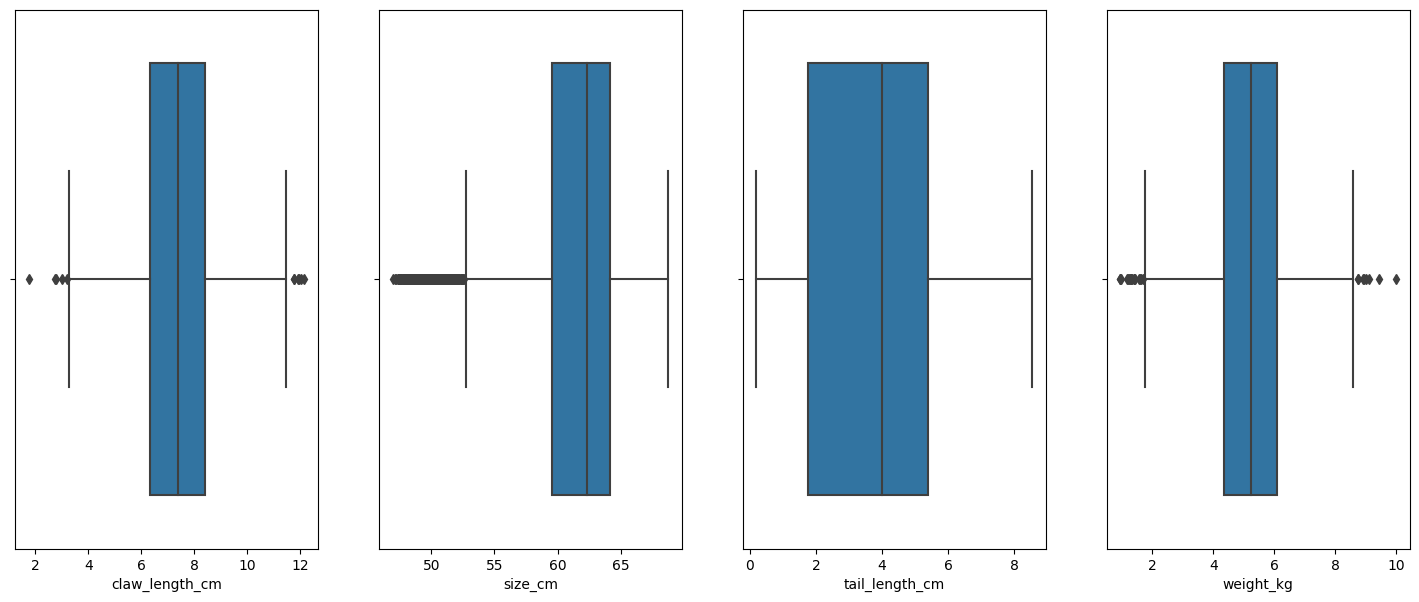

In [23]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (18,7))

i = 0
for names in numbercol_names:
    sns.boxplot(data=df, x=names, ax=axs[i])
    i+=1


Only the tail length does not have outliers. In particular, the claw length_cm and the weight_kg have outliers from both sides of the boxes

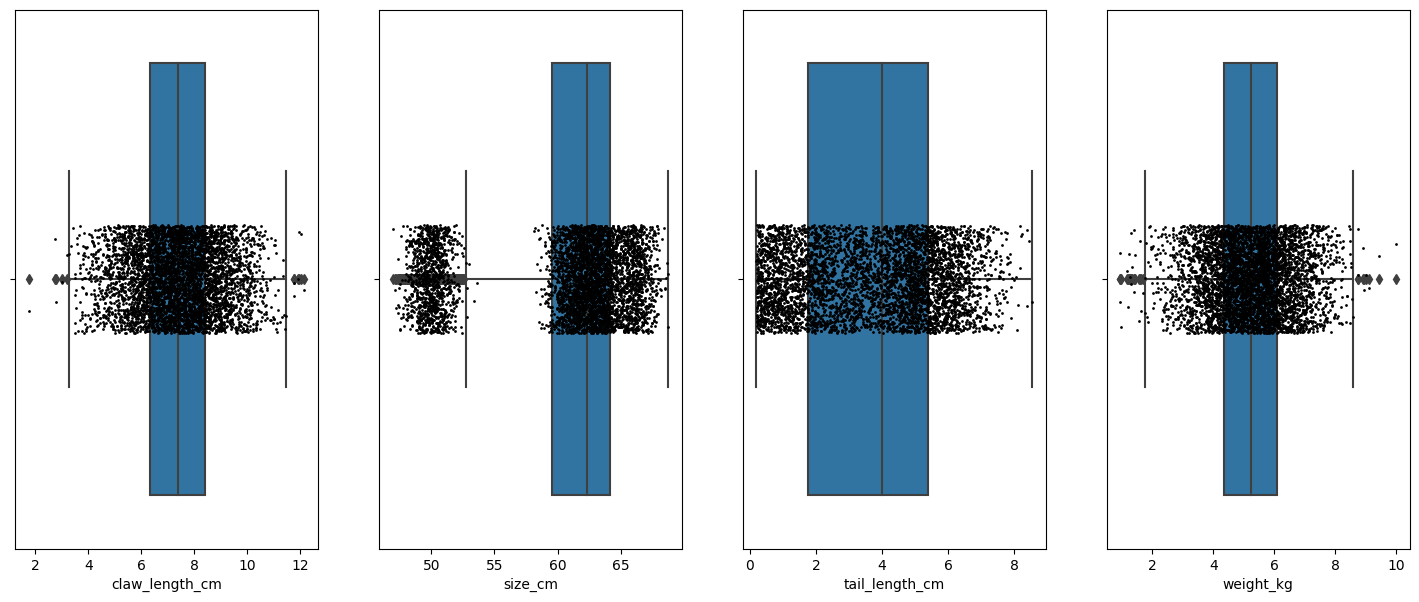

In [24]:
# It is helpful to observate the boxplots with all the observations along

fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (18,7))

i = 0
for names in numbercol_names:
    sns.boxplot(data=df,  x=names, ax=axs[i])
    sns.stripplot(data=df,  x=names, ax=axs[i], color='black', size=2)
    i+=1


In [25]:
claw_quantils = df.claw_length_cm.quantile([0.25,0.50,0.75])

In [26]:
dfit1 = distfit(method = 'parametric', todf = True, distr = ['norm','expon','loggamma','t','beta','gamma','lognorm','genextreme','dweibull','uniform','expo','pareto'])
dfit1.fit_transform(df['claw_length_cm'])
dfit1.model
dfit1.summary[['name', 'score', 'loc', 'scale']]

[distfit] >INFO> fit
[distfit] >ERROR> [expo] does not exist! <skipping>
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.00271763] [loc=7.374 scale=1.503]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.561462] [loc=1.748 scale=5.626]
[distfit] >INFO> [loggamma  ] [0.06 sec] [RSS: 0.00231706] [loc=-113.809 scale=22.419]
[distfit] >INFO> [t         ] [0.39 sec] [RSS: 0.00271807] [loc=7.374 scale=1.503]
[distfit] >INFO> [beta      ] [0.09 sec] [RSS: 0.00175163] [loc=-0.182 scale=14.212]
[distfit] >INFO> [gamma     ] [0.12 sec] [RSS: 0.00318542] [loc=-55.334 scale=0.036]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.00271792] [loc=-131070.252 scale=131077.626]
[distfit] >INFO> [genextreme] [0.10 sec] [RSS: 0.00316769] [loc=6.833 scale=1.507]
[distfit] >INFO> [dweibull  ] [0.03 sec] [RSS: 0.0108113] [loc=7.369 scale=1.309]
[distfit] >INFO> [uniform   ] [0.0 sec] [RSS: 0.367275] [loc=1.748 scale=10.423]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.561462]

name     score             loc          scale
0         beta  0.001752       -0.182336      14.212471
1     loggamma  0.002317     -113.809313      22.419137
2         norm  0.002718        7.374385       1.502577
3      lognorm  0.002718     -131070.252  131077.626376
4            t  0.002718        7.374378       1.502561
5   genextreme  0.003168        6.832729       1.507284
6        gamma  0.003185      -55.333815       0.036118
7     dweibull  0.010811        7.369001       1.308874
8      uniform  0.367275           1.748         10.423
9       pareto  0.561462 -1073741822.252   1073741824.0
10       expon  0.561462           1.748       5.626385

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Beta (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

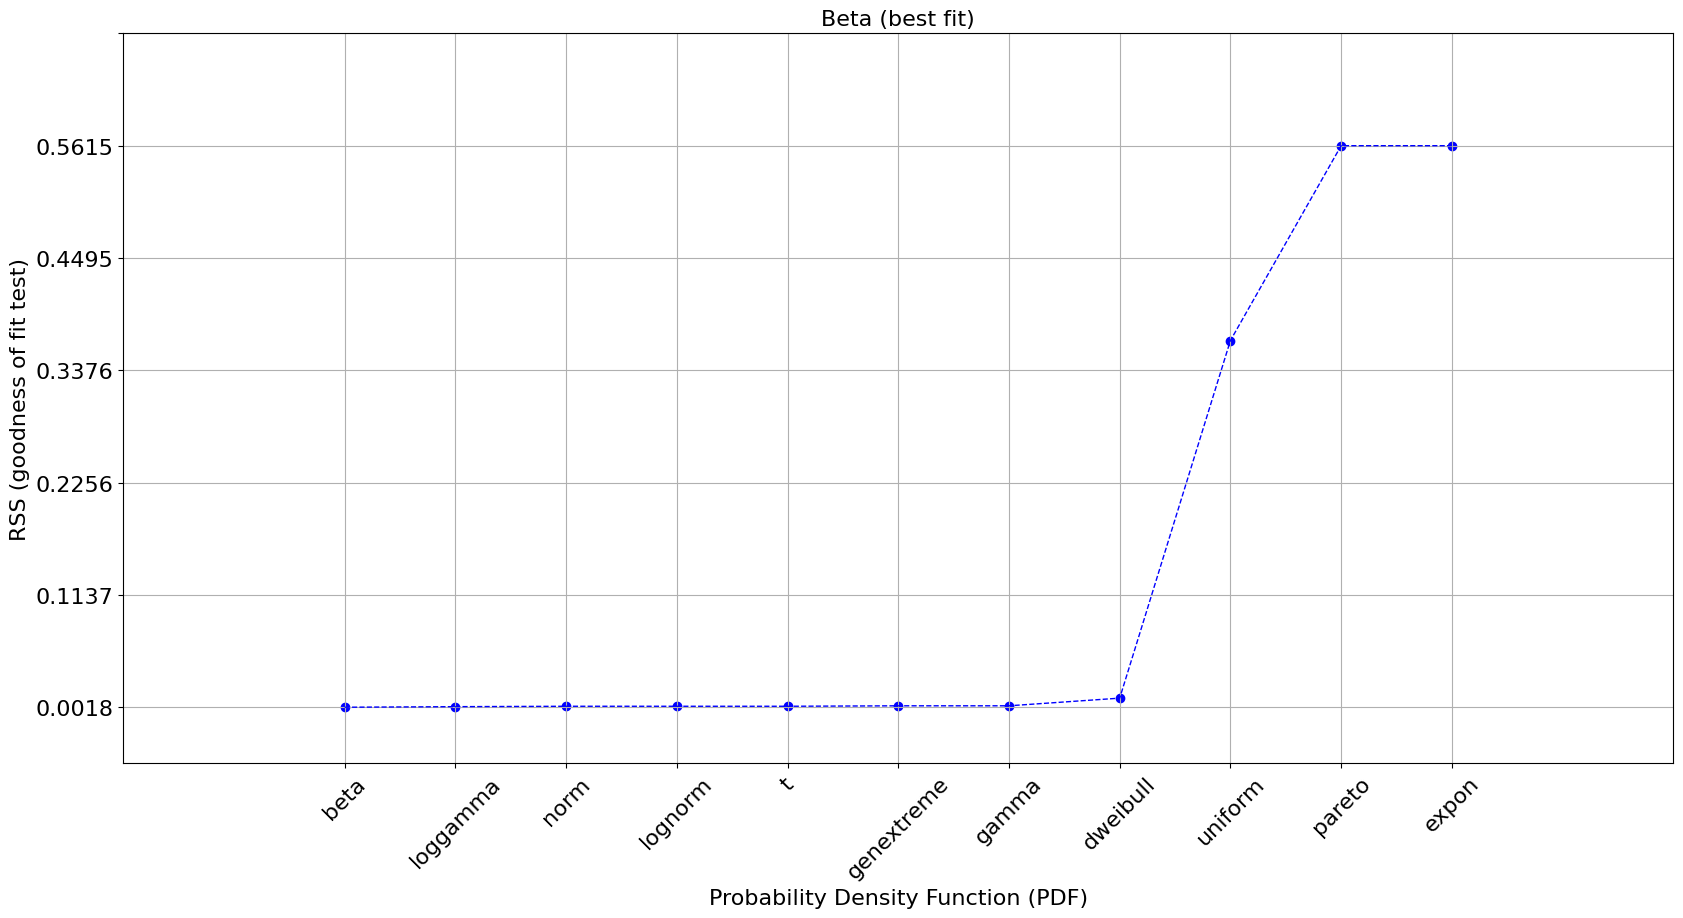

In [27]:
dfit1.plot_summary()

(None,
 <Axes: title={'center': '\nbeta(a=11.317, b=9.96794, loc=-0.182336, scale=14.2125)'}, xlabel='Values', ylabel='Frequency'>)

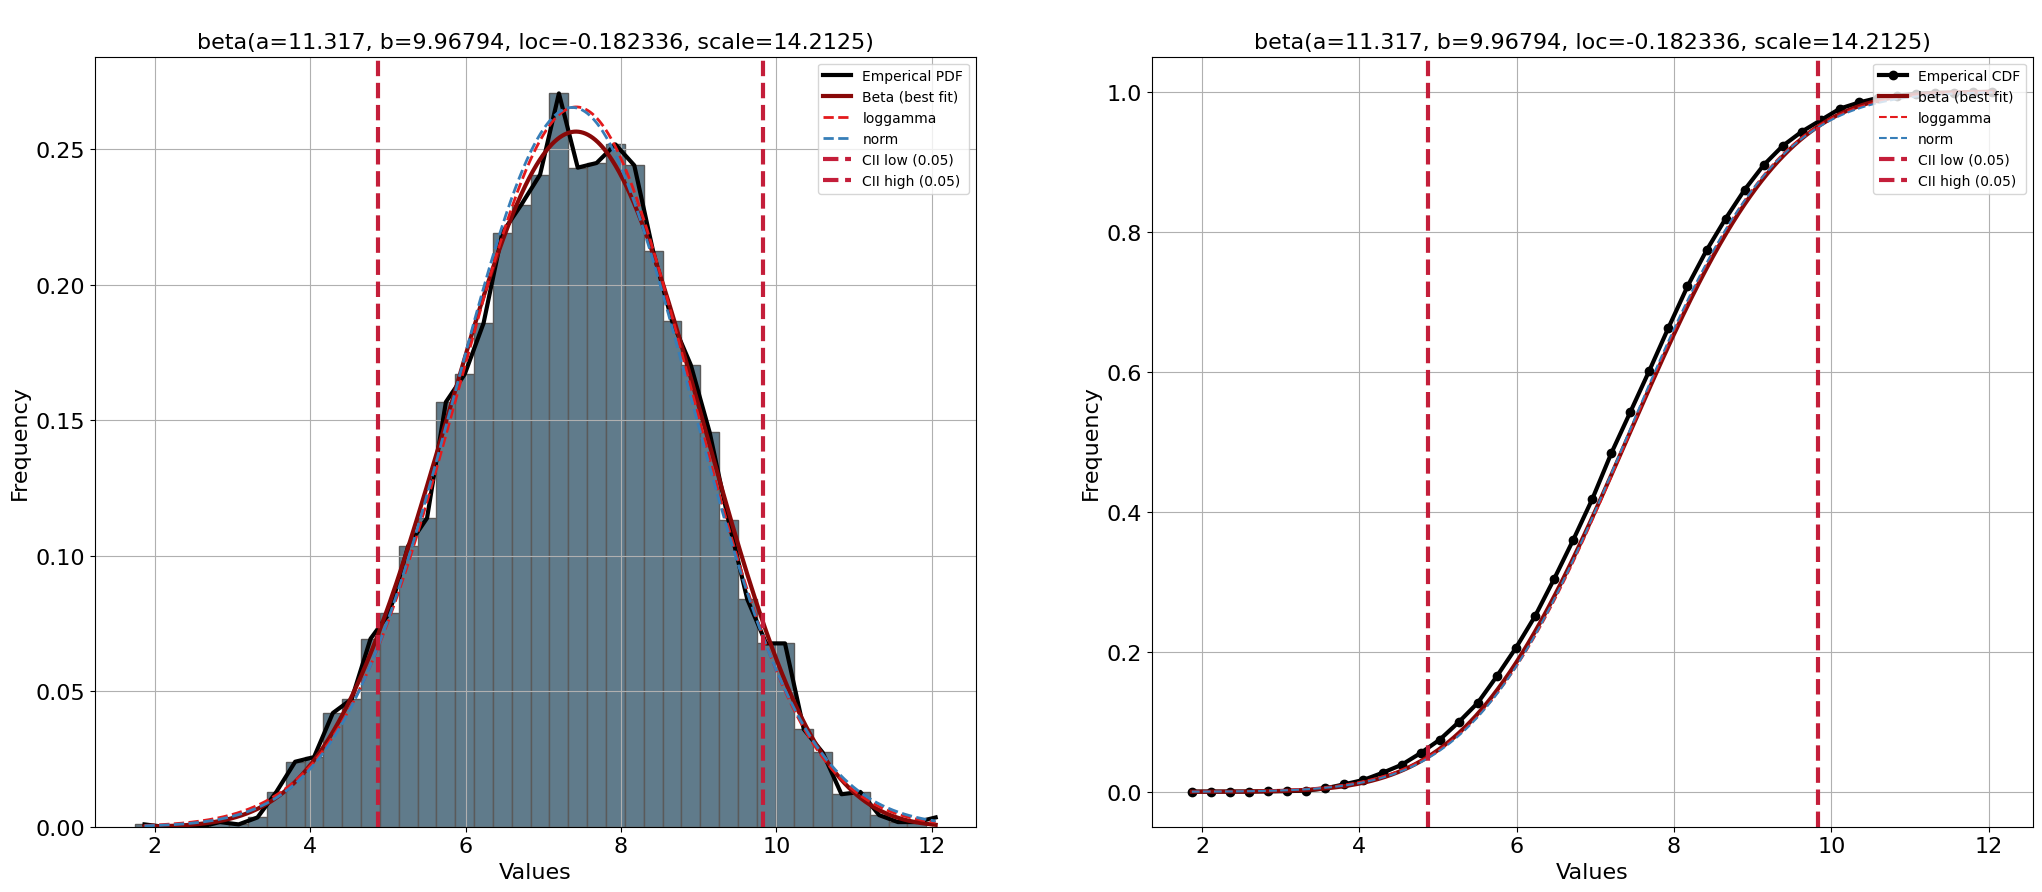

In [28]:
# Create subplot
fig, ax = plt.subplots(1,2, figsize=(25, 10))
# Plot PDF with histogram
dfit1.plot(chart='PDF', n_top=2, ax=ax[0])
# Plot the CDF
dfit1.plot(chart='CDF', n_top=2, ax=ax[1])

In [29]:
dfit2 = distfit(method = 'parametric', todf = True, distr = ['norm','expon','loggamma','t','beta','gamma','lognorm','genextreme','dweibull','uniform','expo','pareto'])
dfit2.fit_transform(df['size_cm'])
dfit2.model
dfit2.summary[['name', 'score', 'loc', 'scale']]


[distfit] >INFO> fit
[distfit] >ERROR> [expo] does not exist! <skipping>
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.0 sec] [RSS: 0.0876528] [loc=60.196 scale=5.943]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.127481] [loc=46.928 scale=13.268]
[distfit] >INFO> [loggamma  ] [0.01 sec] [RSS: 0.0470347] [loc=66.537 scale=1.269]
[distfit] >INFO> [t         ] [0.40 sec] [RSS: 0.0876538] [loc=60.196 scale=5.943]
[distfit] >INFO> [beta      ] [0.32 sec] [RSS: 0.0531783] [loc=-40169.468 scale=40238.264]
[distfit] >INFO> [gamma     ] [0.12 sec] [RSS: 0.0923572] [loc=-28.192 scale=0.432]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.0876534] [loc=-850157.845 scale=850218.041]
[distfit] >INFO> [genextreme] [0.10 sec] [RSS: 0.0607418] [loc=59.183 scale=6.239]
[distfit] >INFO> [dweibull  ] [0.09 sec] [RSS: 0.080508] [loc=62.638 scale=4.003]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.089952] [loc=46.928 scale=21.832]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.1274

name     score             loc          scale
0     loggamma  0.047035       66.536981       1.269145
1         beta  0.053178   -40169.467685   40238.264311
2   genextreme  0.060742         59.1831       6.239313
3     dweibull  0.080508          62.638       4.002661
4         norm  0.087653       60.196081       5.942912
5      lognorm  0.087653  -850157.844796  850218.040856
6            t  0.087654       60.195978       5.942878
7      uniform  0.089952          46.928         21.832
8        gamma  0.092357      -28.191733        0.43204
9        expon  0.127481          46.928      13.268081
10      pareto  0.127481 -1073741777.072   1073741824.0

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Loggamma (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

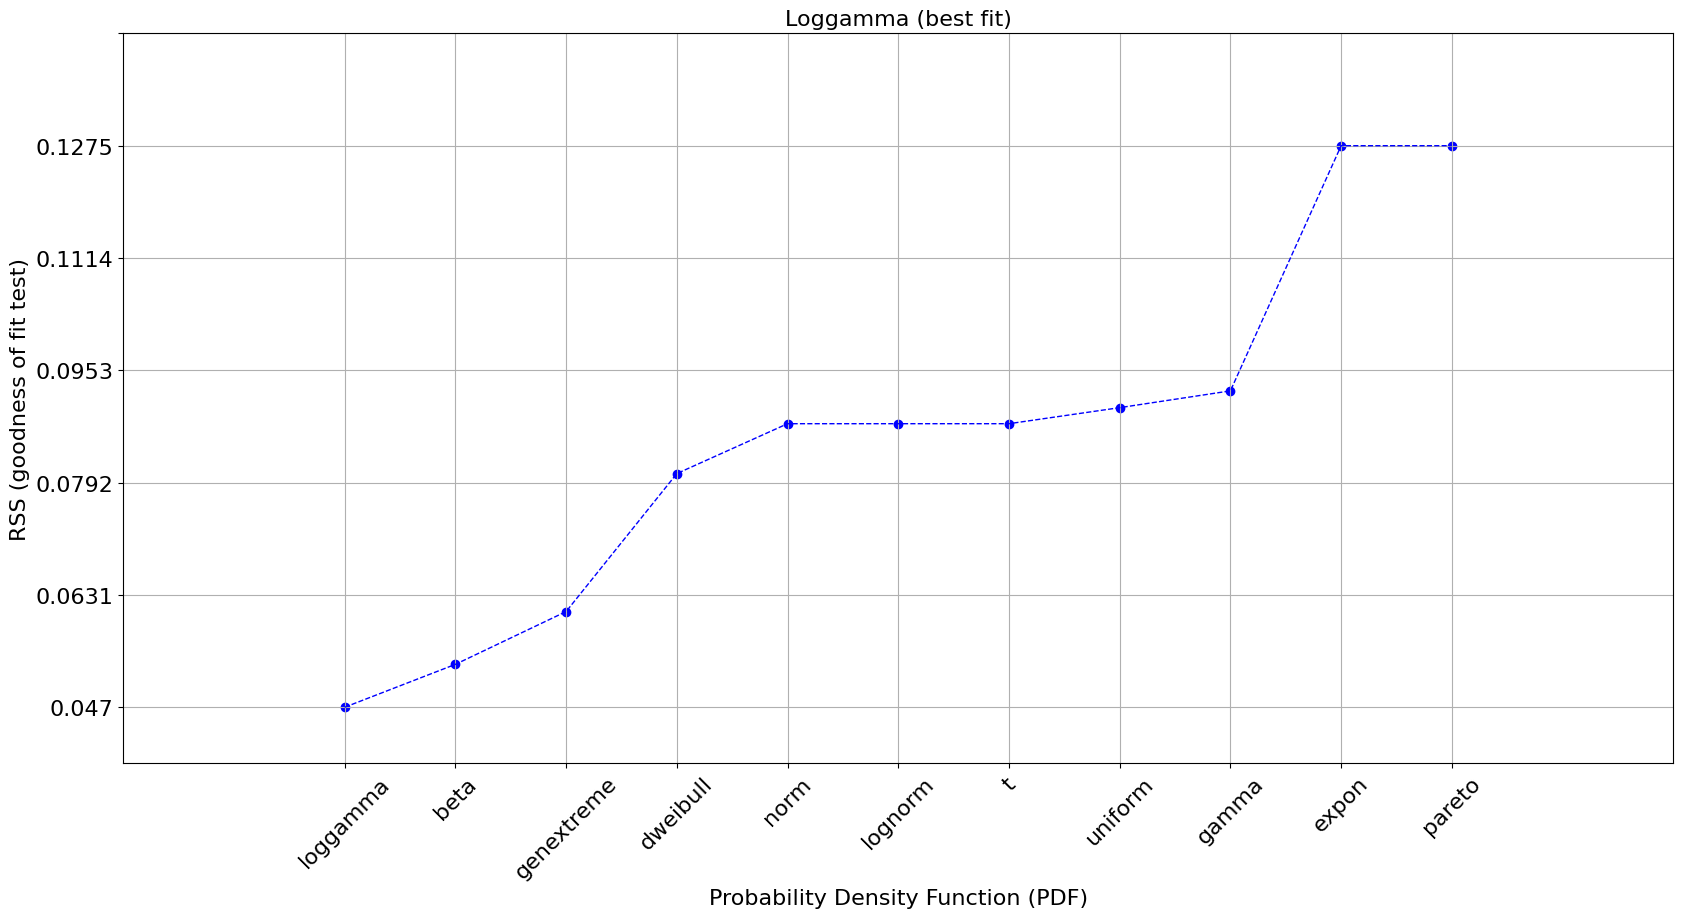

In [30]:
dfit2.plot_summary()

(None,
 <Axes: title={'center': '\nloggamma(c=0.211775, loc=66.537, scale=1.26914)'}, xlabel='Values', ylabel='Frequency'>)

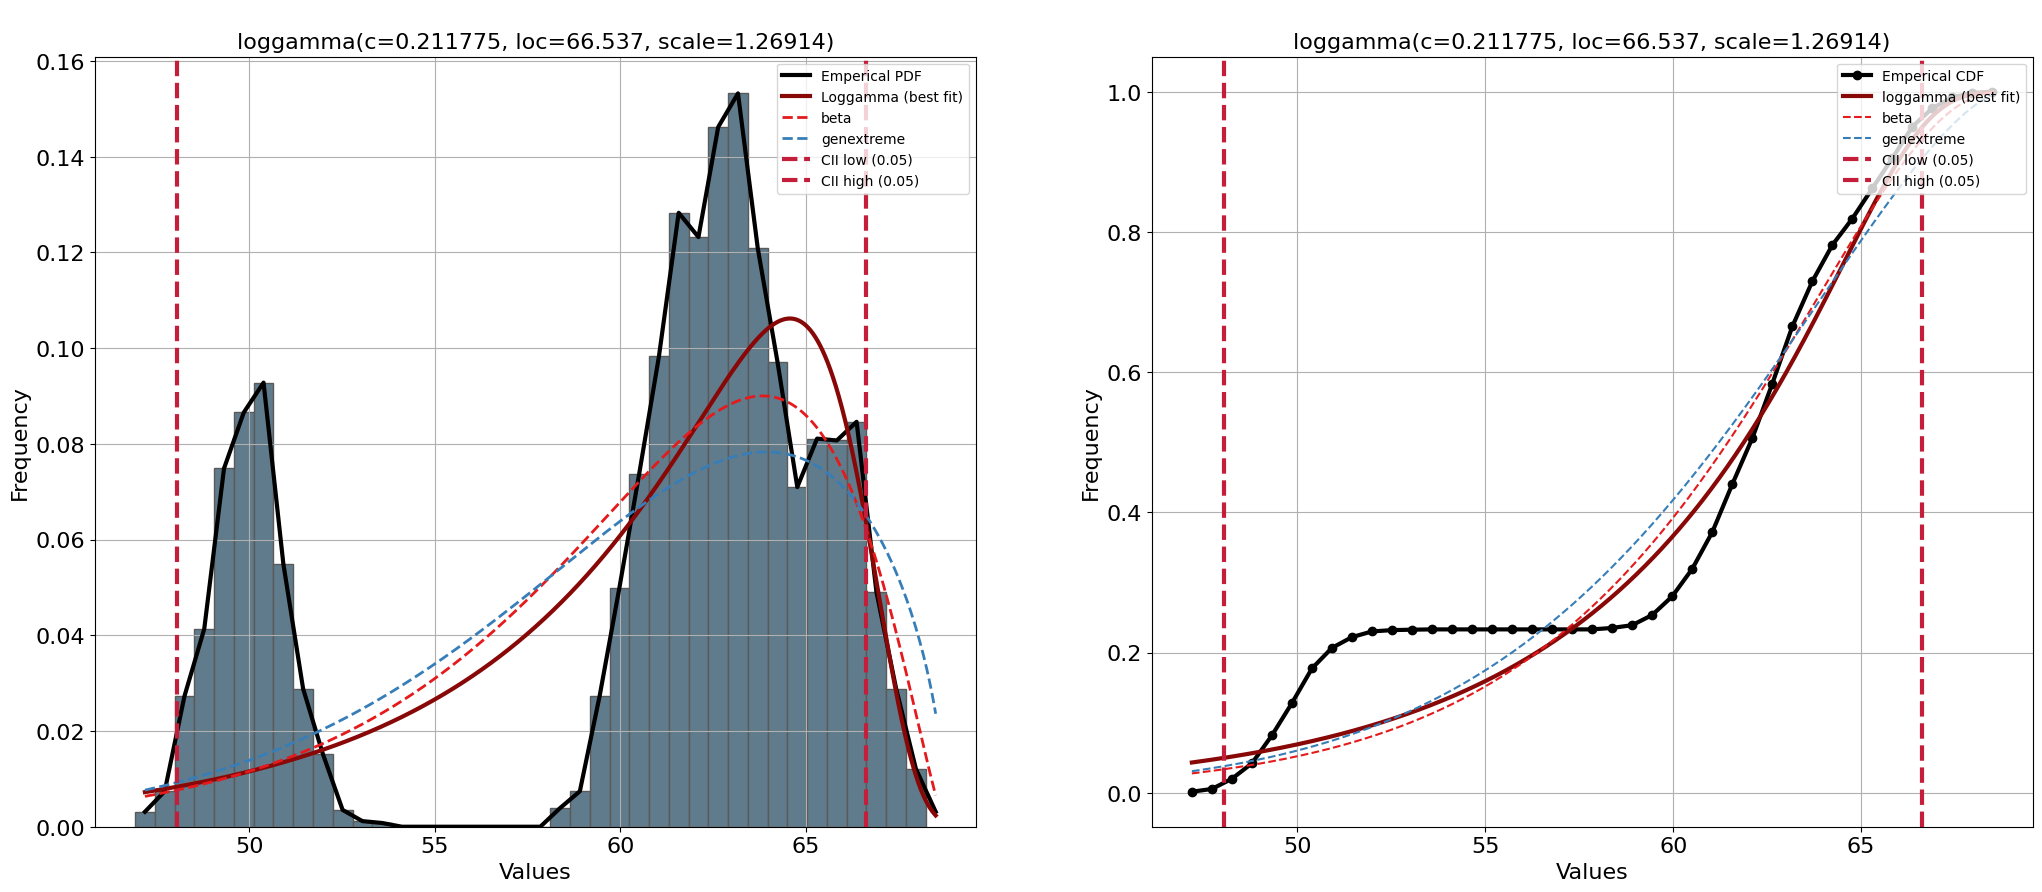

In [31]:
# Create subplot
fig, ax = plt.subplots(1,2, figsize=(25, 10))
# Plot PDF with histogram
dfit2.plot(chart='PDF', n_top=2, ax=ax[0])
# Plot the CDF
dfit2.plot(chart='CDF', n_top=2, ax=ax[1])

In [32]:
dfit3 = distfit(method = 'parametric', todf = True, distr = ['norm','expon','loggamma','t','beta','gamma','lognorm','genextreme','dweibull','uniform','expo','pareto'])
dfit3.fit_transform(df['tail_length_cm'])
dfit3.model
dfit3.summary[['name', 'score', 'loc', 'scale']]


[distfit] >INFO> fit
[distfit] >ERROR> [expo] does not exist! <skipping>
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0747746] [loc=3.667 scale=2.069]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.0977894] [loc=0.201 scale=3.466]
[distfit] >INFO> [loggamma  ] [0.02 sec] [RSS: 0.0713154] [loc=-24.312 scale=9.314]
[distfit] >INFO> [t         ] [0.40 sec] [RSS: 0.0747734] [loc=3.667 scale=2.069]
[distfit] >INFO> [beta      ] [0.17 sec] [RSS: 0.0428349] [loc=0.200 scale=8.342]
[distfit] >INFO> [gamma     ] [0.12 sec] [RSS: 0.0756863] [loc=-57.736 scale=0.070]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.074775] [loc=-262143.799 scale=262147.466]
[distfit] >INFO> [genextreme] [0.12 sec] [RSS: 0.0635881] [loc=3.027 scale=2.124]
[distfit] >INFO> [dweibull  ] [0.06 sec] [RSS: 0.0419773] [loc=3.560 scale=2.040]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0730701] [loc=0.201 scale=8.337]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.0977894] [loc=-53

name     score            loc          scale
0     dweibull  0.041977       3.560239       2.040496
1         beta  0.042835       0.200001       8.342236
2   genextreme  0.063588       3.026587       2.123972
3     loggamma  0.071315     -24.311837        9.31373
4      uniform   0.07307          0.201          8.337
5            t  0.074773       3.667054       2.068709
6         norm  0.074775       3.667065       2.068692
7      lognorm  0.074775    -262143.799  262147.466056
8        gamma  0.075686     -57.736094       0.070101
9       pareto  0.097789 -536870911.799    536870912.0
10       expon  0.097789          0.201       3.466065

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Dweibull (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

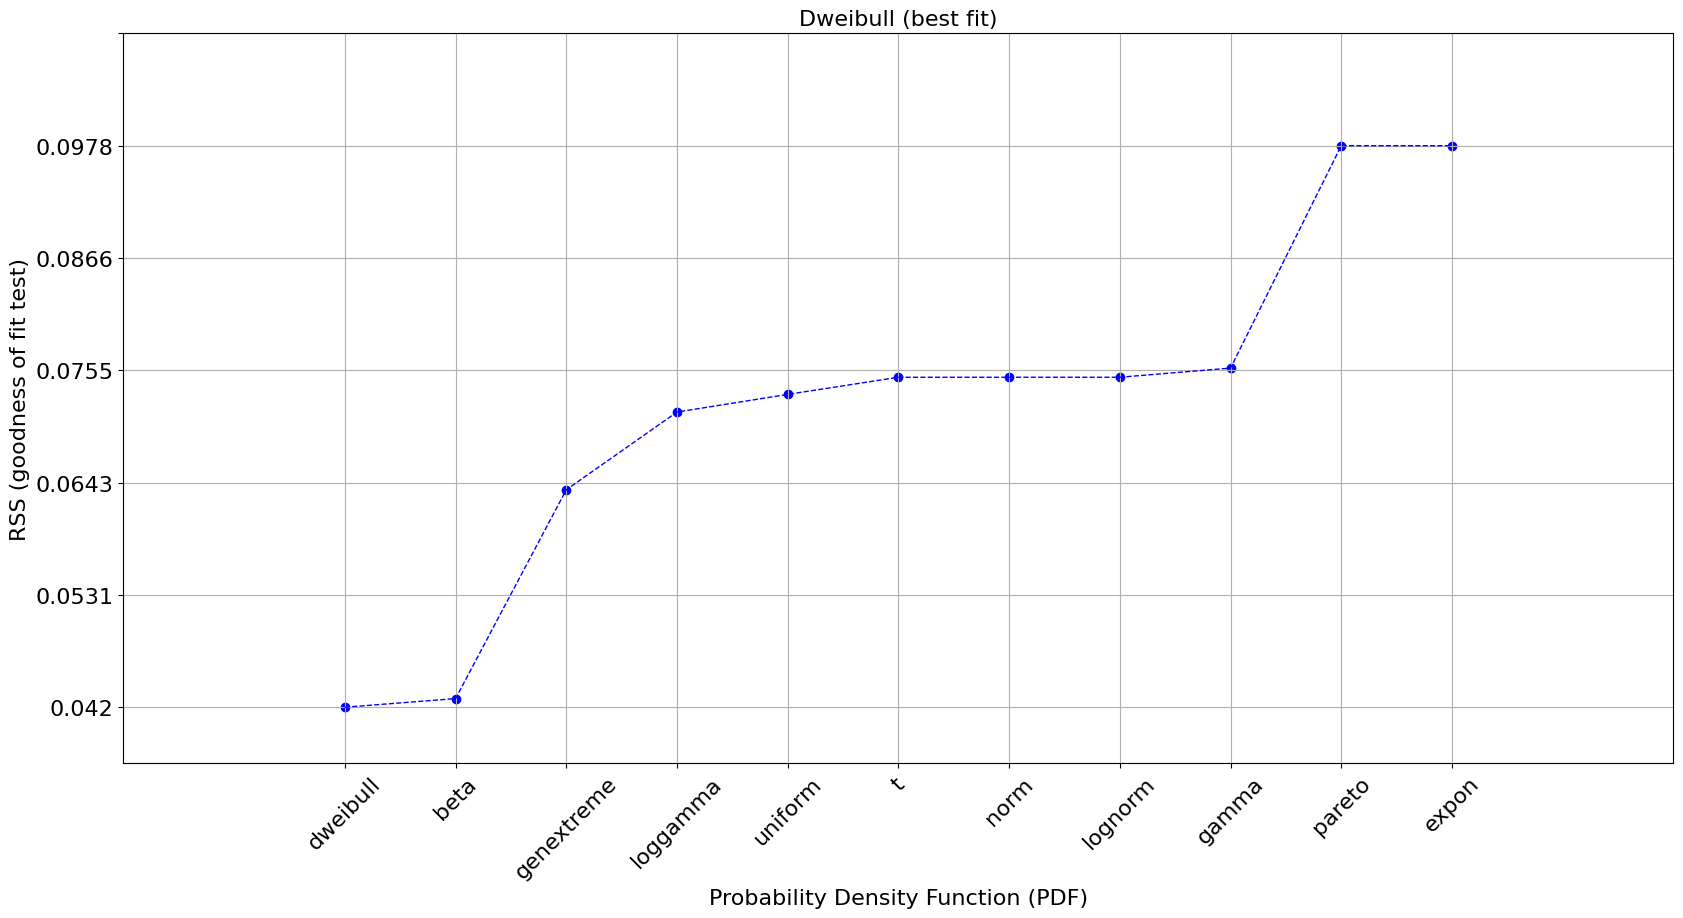

In [33]:
dfit3.plot_summary()

(None,
 <Axes: title={'center': '\ndweibull(c=1.84944, loc=3.56024, scale=2.0405)'}, xlabel='Values', ylabel='Frequency'>)

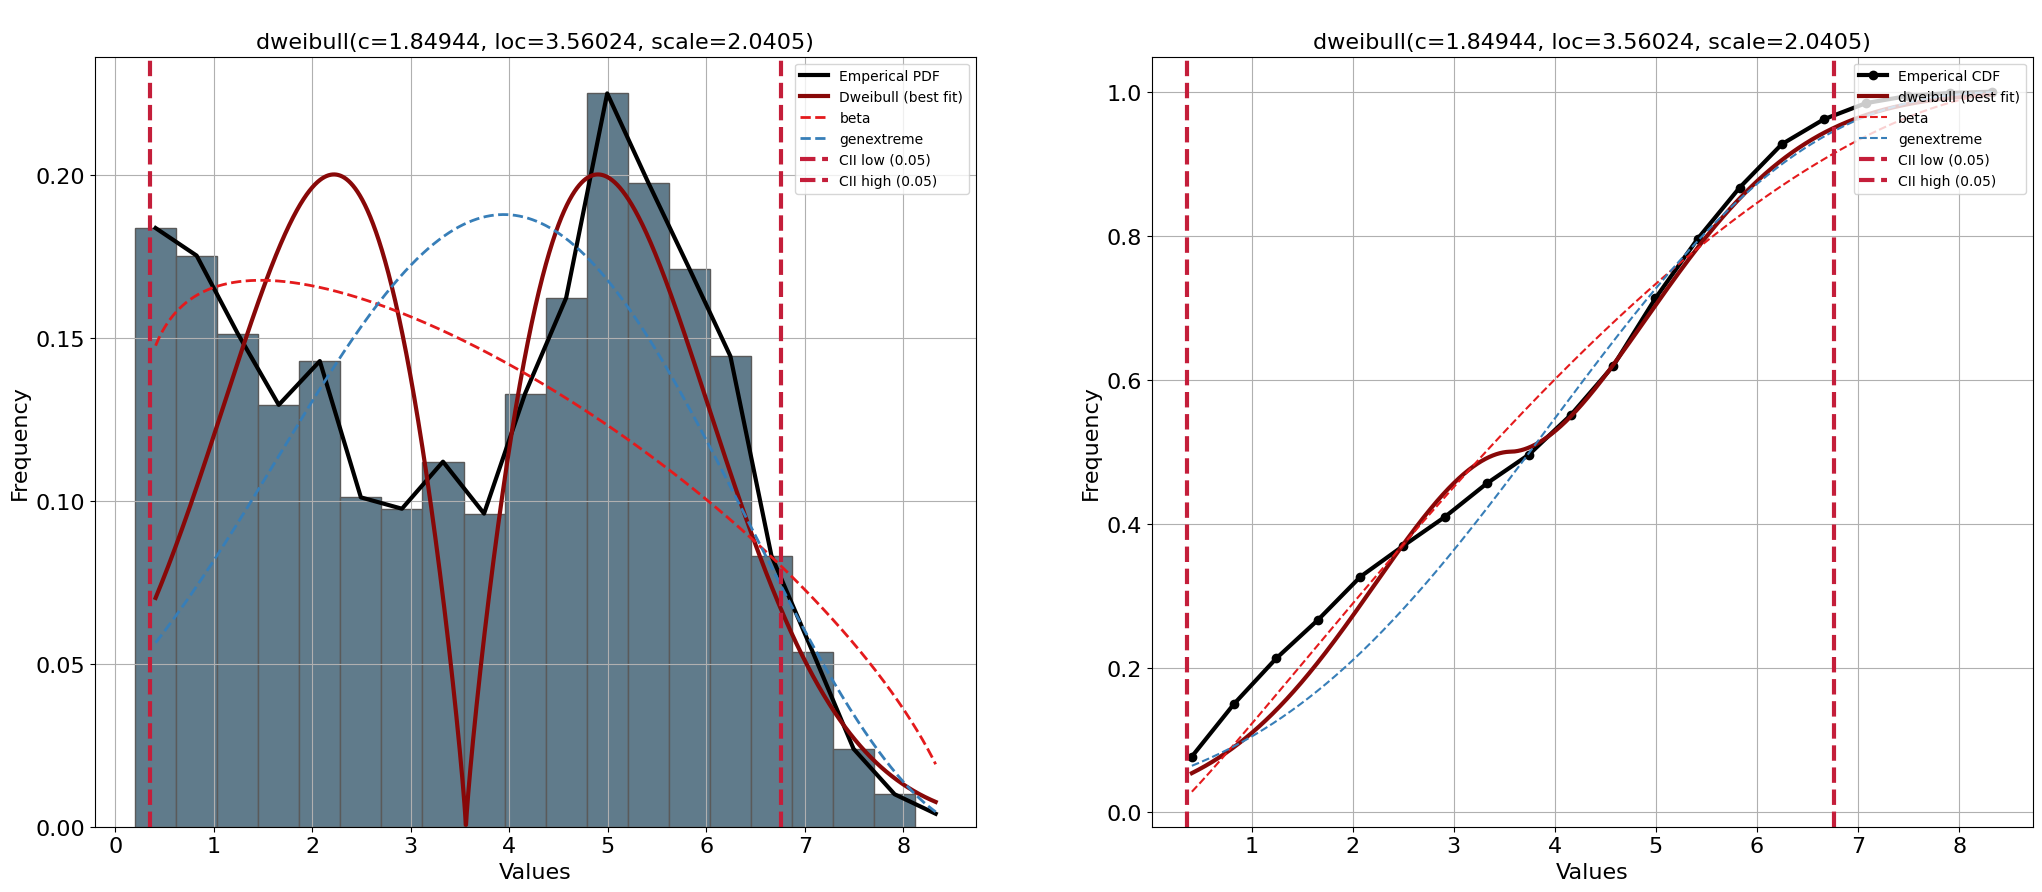

In [34]:
# Create subplot
fig, ax = plt.subplots(1,2, figsize=(25, 10))
# Plot PDF with histogram
dfit3.plot(chart='PDF', n_top=2, ax=ax[0])
# Plot the CDF
dfit3.plot(chart='CDF', n_top=2, ax=ax[1])

In [35]:
dfit = distfit(method = 'parametric', todf = True, distr = ['norm','expon','loggamma','t','beta','gamma','lognorm','genextreme','dweibull','uniform','expo','pareto'])
dfit.fit_transform(df['weight_kg'])
dfit.model
dfit.summary[['name', 'score', 'loc', 'scale']]


[distfit] >INFO> fit
[distfit] >ERROR> [expo] does not exist! <skipping>
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.00611805] [loc=5.217 scale=1.262]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.782555] [loc=0.946 scale=4.271]
[distfit] >INFO> [loggamma  ] [0.05 sec] [RSS: 0.00604715] [loc=-89.241 scale=17.835]
[distfit] >INFO> [t         ] [0.39 sec] [RSS: 0.00611811] [loc=5.217 scale=1.262]
[distfit] >INFO> [beta      ] [0.12 sec] [RSS: 0.00553989] [loc=-6.305 scale=20.294]
[distfit] >INFO> [gamma     ] [0.13 sec] [RSS: 0.0065462] [loc=-41.317 scale=0.034]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.00611832] [loc=-65535.054 scale=65540.271]
[distfit] >INFO> [genextreme] [0.15 sec] [RSS: 0.00899754] [loc=4.738 scale=1.261]
[distfit] >INFO> [dweibull  ] [0.04 sec] [RSS: 0.0408037] [loc=5.267 scale=1.101]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.555072] [loc=0.946 scale=9.051]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.782555] [lo

name     score            loc         scale
0         beta   0.00554       -6.30523     20.294451
1     loggamma  0.006047     -89.241168     17.834575
2         norm  0.006118       5.217161      1.262302
3            t  0.006118       5.217162        1.2623
4      lognorm  0.006118     -65535.054  65540.271149
5        gamma  0.006546     -41.317362      0.034325
6   genextreme  0.008998       4.738413      1.261382
7     dweibull  0.040804       5.267115      1.101089
8      uniform  0.555072          0.946         9.051
9       pareto  0.782555 -536870911.054   536870912.0
10       expon  0.782555          0.946      4.271161

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Beta (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

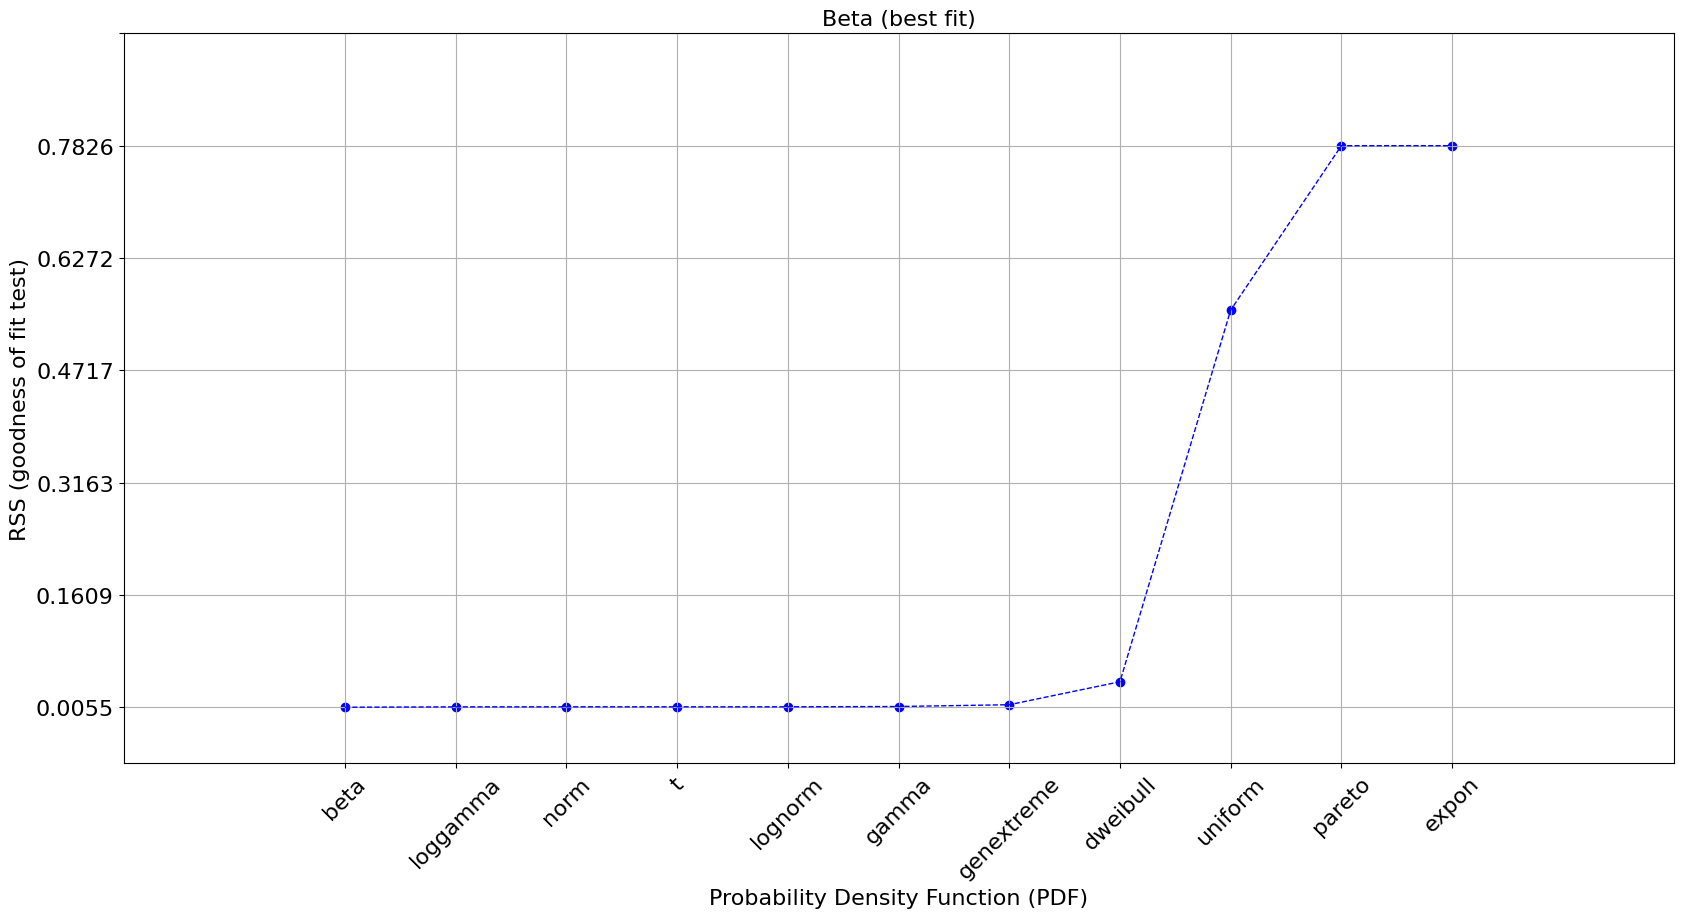

In [36]:
dfit.plot_summary()

(None,
 <Axes: title={'center': '\nbeta(a=35.4483, b=26.9869, loc=-6.30523, scale=20.2945)'}, xlabel='Values', ylabel='Frequency'>)

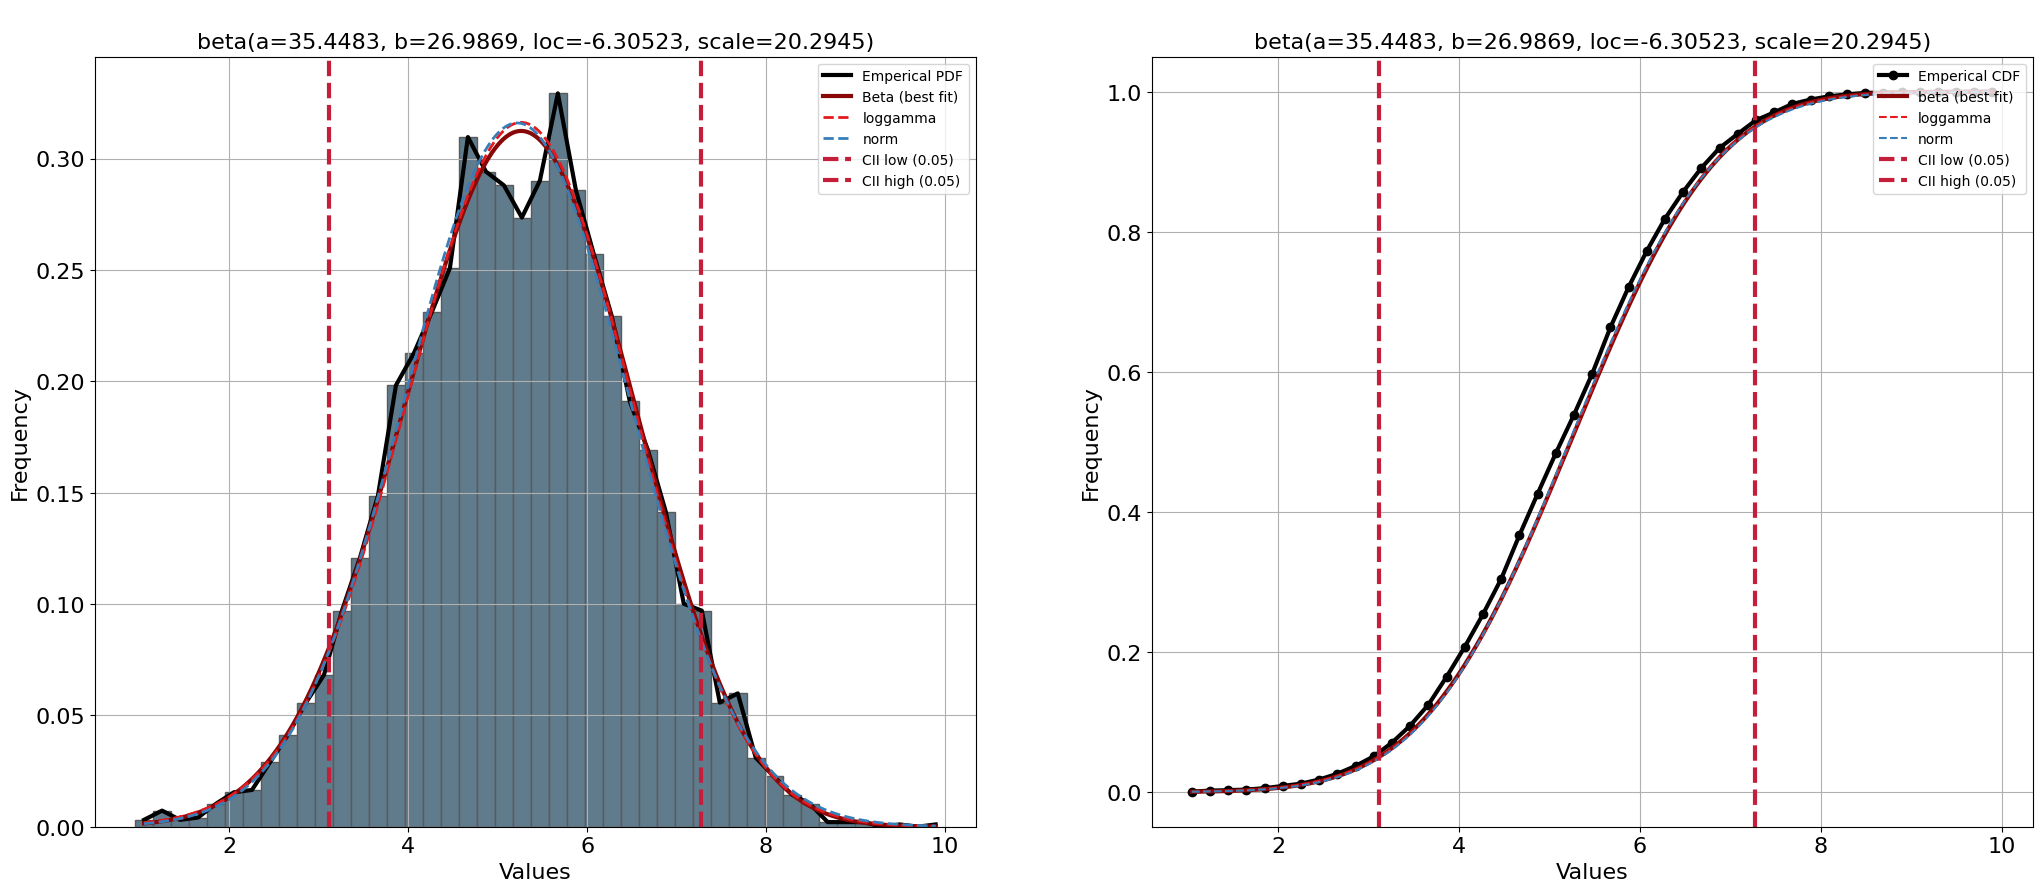

In [37]:
# Create subplot
fig, ax = plt.subplots(1,2, figsize=(25, 10))
# Plot PDF with histogram
dfit.plot(chart='PDF', n_top=2, ax=ax[0])
# Plot the CDF
dfit.plot(chart='CDF', n_top=2, ax=ax[1])

If we look at the score which is the SSR value for every distribution function that tries to fit the data distribution, the beta distribution is the best fit for the claw_length and the 
weight even when the histogram looks like a normal distribution. This could be due to the fact of the outliers existance.

In [38]:
df.claw_length_cm.quantile([0.25,0.5,0.75])

0.25    6.34875
0.50    7.39950
0.75    8.42225
Name: claw_length_cm, dtype: float64

Now let's take a look of the ECDF:

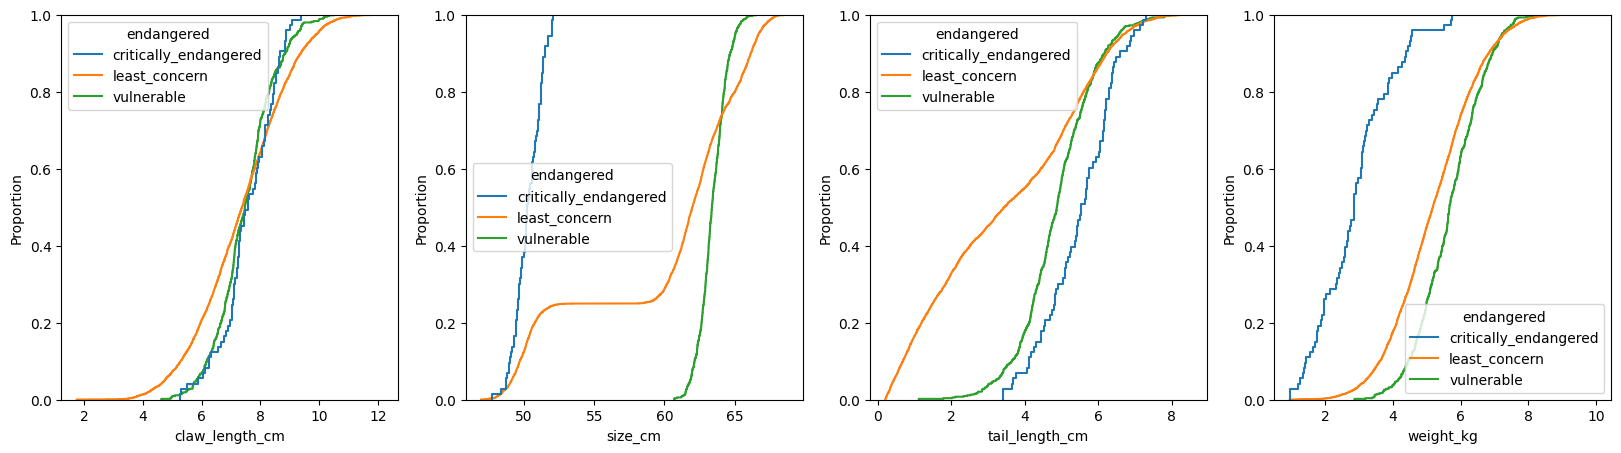

In [39]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (20,5))

i = 0
for names in numbercol_names:
    sns.ecdfplot(data=df, x=names, ax=axs[i], hue='endangered')
    i+=1

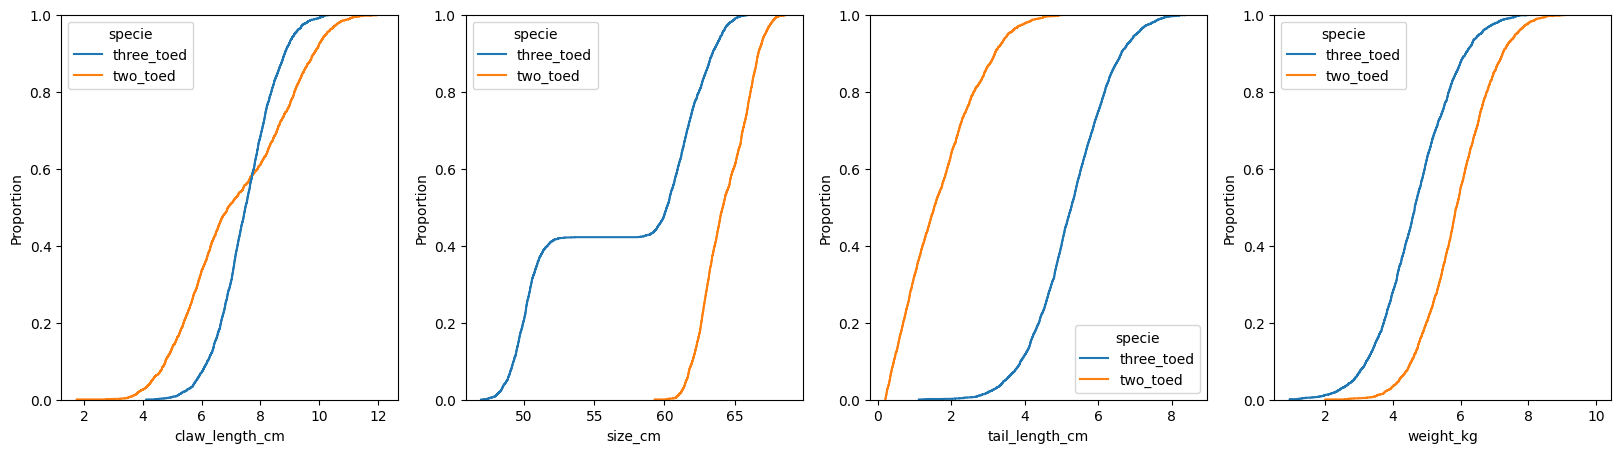

In [40]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (20,5))

i = 0
for names in numbercol_names:
    sns.ecdfplot(data=df, x=names, ax=axs[i], hue='specie')
    i+=1

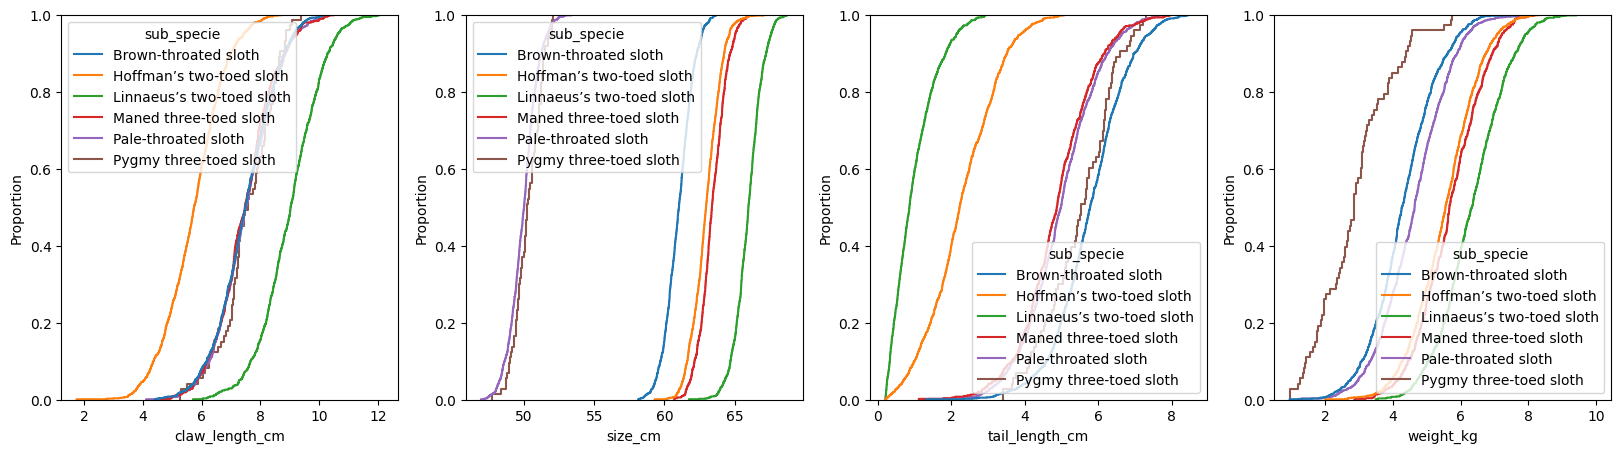

In [41]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (20,5))

i = 0
for names in numbercol_names:
    sns.ecdfplot(data=df, x=names, ax=axs[i], hue='sub_specie')
    i+=1

From plots above it is possible to obtain interesting insights, the ECDF for the size_cm shows a 'flat' region when is plotted by endangered and specie yet, for the sub_specie is clear that 
this is due to the fact that there is gap between the size of the pygmy and pale-throated sloths from the rest. The Linneau's two-toed sloth is the heaviest sloth and alsois the longest in size
and claw length, but has the shortest tail. <br>
It is time to focus on the scatter plots and look for a relation between numerical variables


In [72]:
# Get correlation values 

correlation_columns = df.describe(include=np.number).columns
correlation = df[correlation_columns].corr()
correlation


claw_length_cm   size_cm  tail_length_cm  weight_kg
claw_length_cm        1.000000  0.050203       -0.062682   0.105137
size_cm               0.050203  1.000000       -0.527462   0.430493
tail_length_cm       -0.062682 -0.527462        1.000000  -0.491970
weight_kg             0.105137  0.430493       -0.491970   1.000000

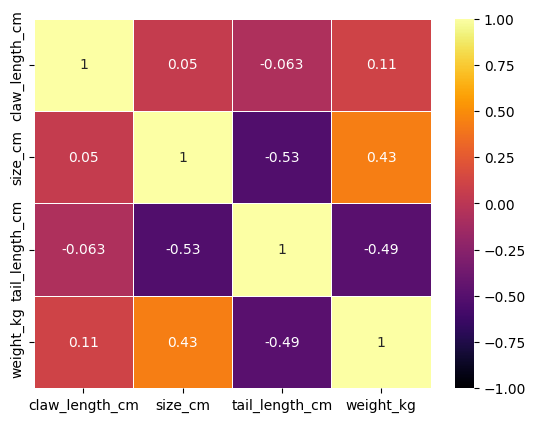

In [84]:
sns.heatmap(
    data = correlation,
    cmap = 'inferno',
    center = 0,
    vmin = -1,
    vmax = 1,
    linewidths = 0.5,
    annot = True
)
plt.show()

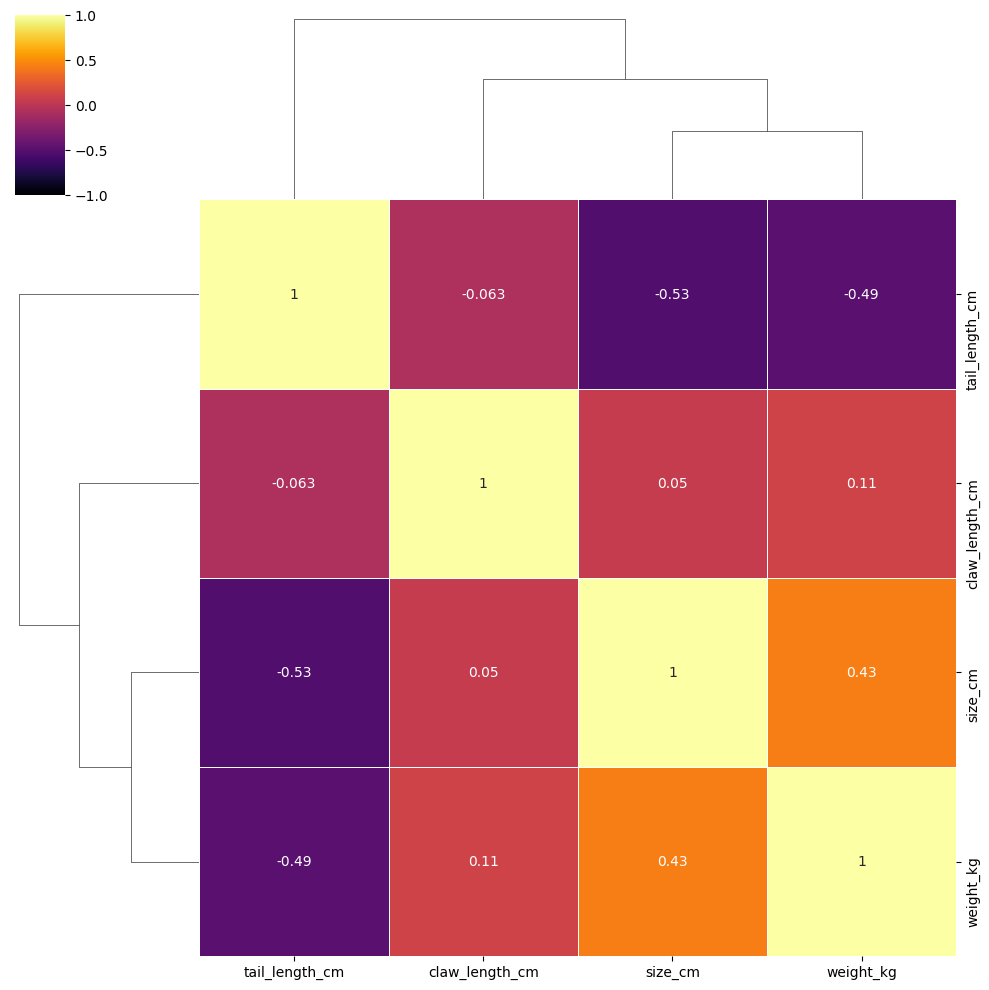

In [87]:
sns.clustermap(
    data = correlation,
    cmap = 'inferno',
    center = 0,
    vmin = -1,
    vmax = 1,
    linewidths = 0.5,
    annot = True
)
plt.show()

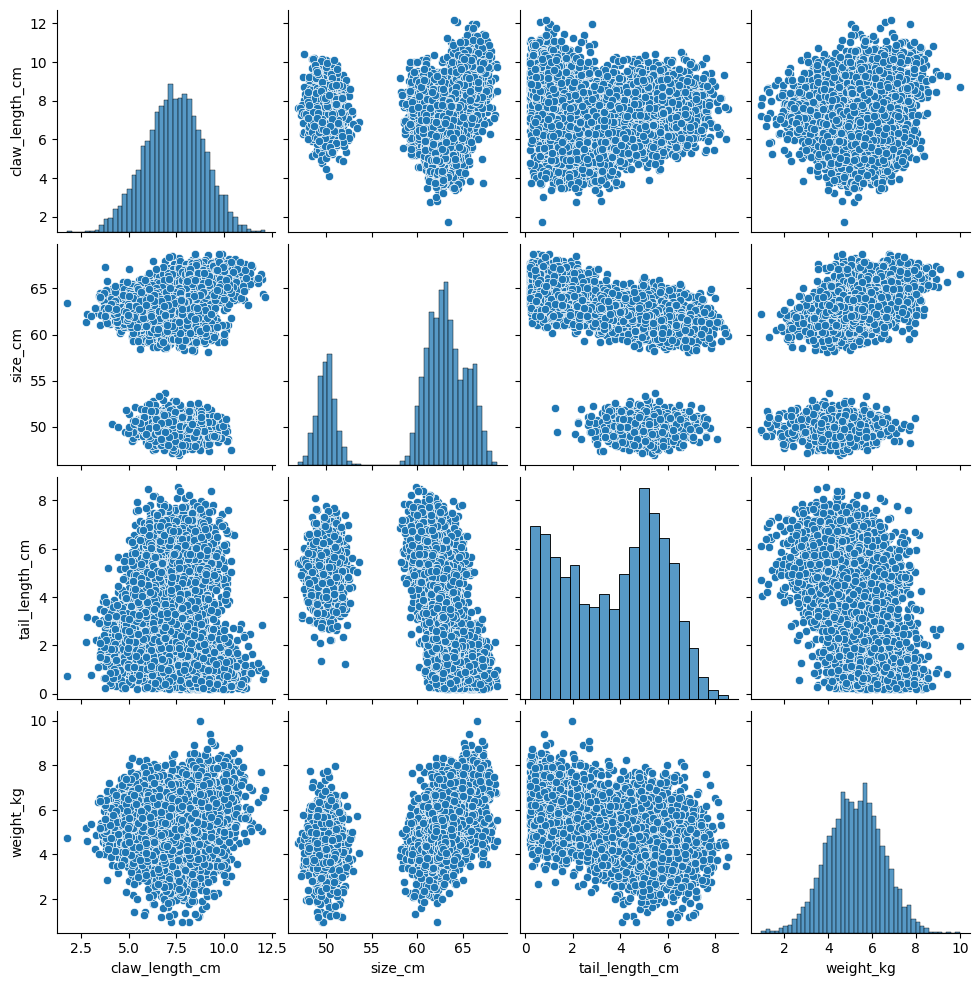

In [90]:
sns.pairplot(data=df)

Above the scatter plot for all the columns is showed. It is clear that there is overplotting for all the scatters. Also, if the hue option is used, the amoung of points will still there even 
when they are classified by category (endangered,specie,sub_specie). Next cells will deal with this and see if plots could lead to solid conclusions

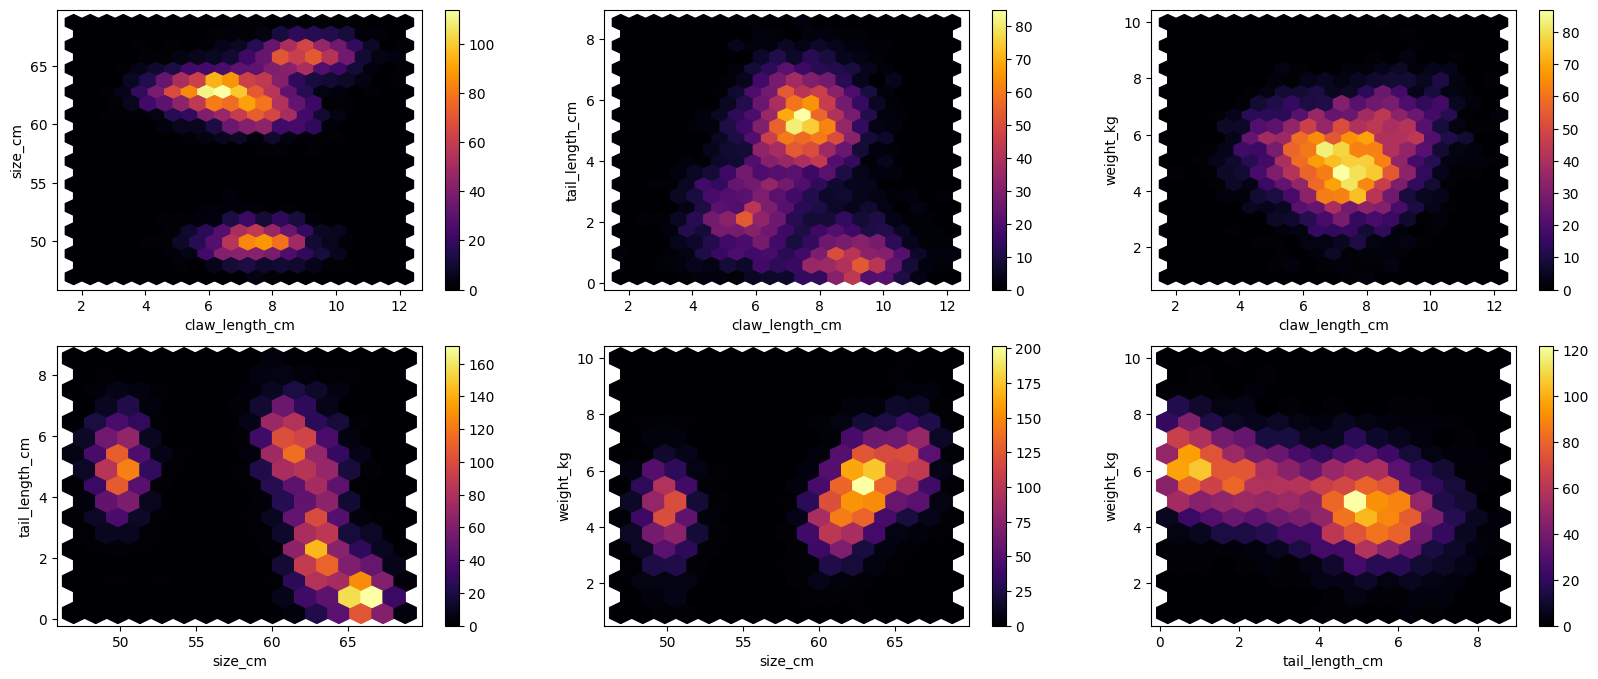

In [130]:
fig , axs = plt.subplots(ncols=3,nrows=2,figsize=(20,8))
i=0
j=0
k=0
for namex in numbercol_names:
    for namey in numbercol_names[i+1:]:
        if i ==0:
            df.plot.hexbin(x=namex,y=namey,ax=axs[0,j],gridsize=20,cmap='inferno')
            j+=1
        else:
            df.plot.hexbin(x=namex,y=namey,ax=axs[1,k],gridsize=15,cmap='inferno')
            k+=1 
    j=0   
    i+=1

Using the hexbin plot it is more clear to see the correlation between the variables. If we keep in mind the correlation matrix, (the couples tail-length_cm,the size_cm) and (weight_kg,tail_length_cm) had a negative correlation (-0.53,-0,49) which is easy to verify on this plots. <br>
Next to see is the data distribution by jittering the scatter plot. With this, we can compare the those distributions among the categories without overlapping

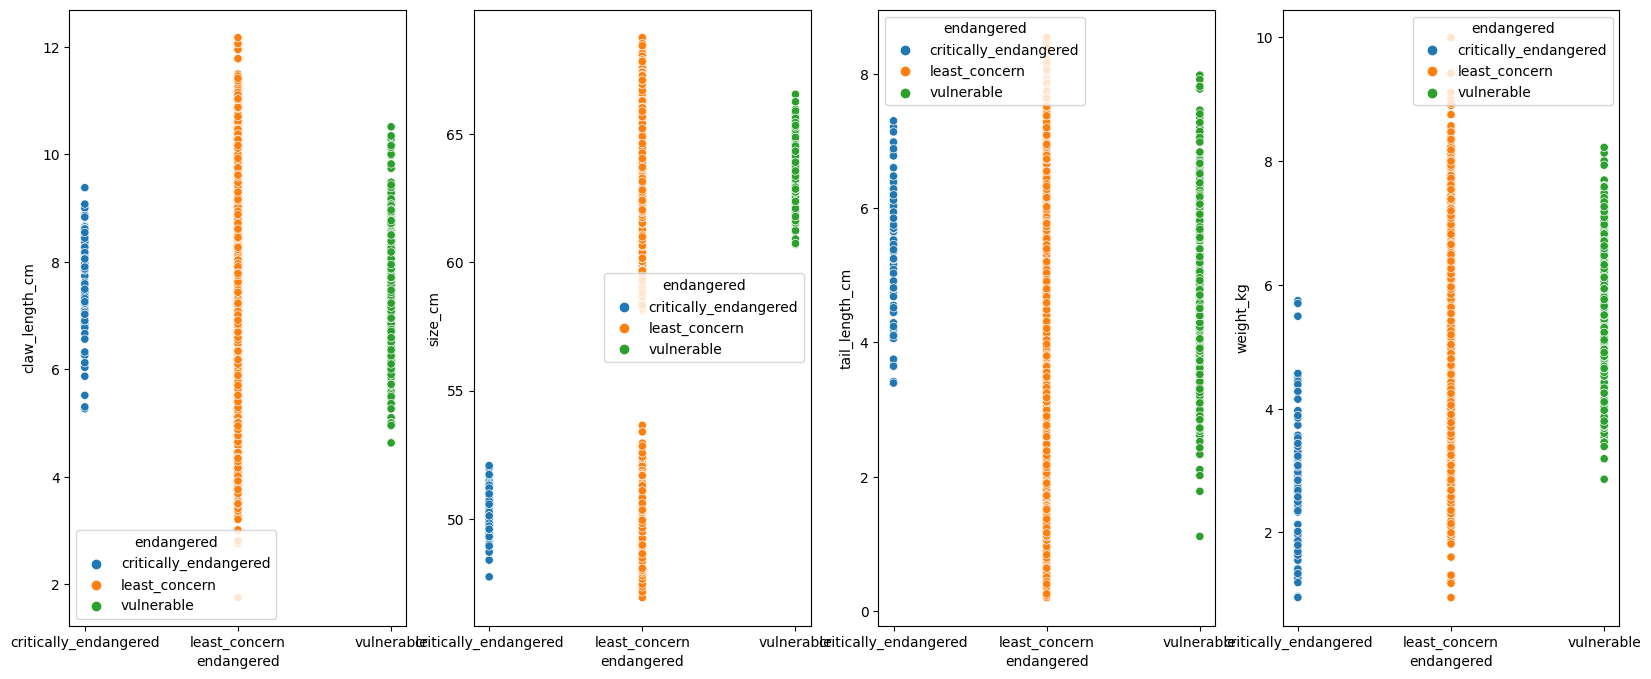

In [134]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (20,8))
i = 0
for names in numbercol_names:
    sns.scatterplot(data=df, x='endangered', y=names, ax=axs[i], hue='endangered')
    i+=1


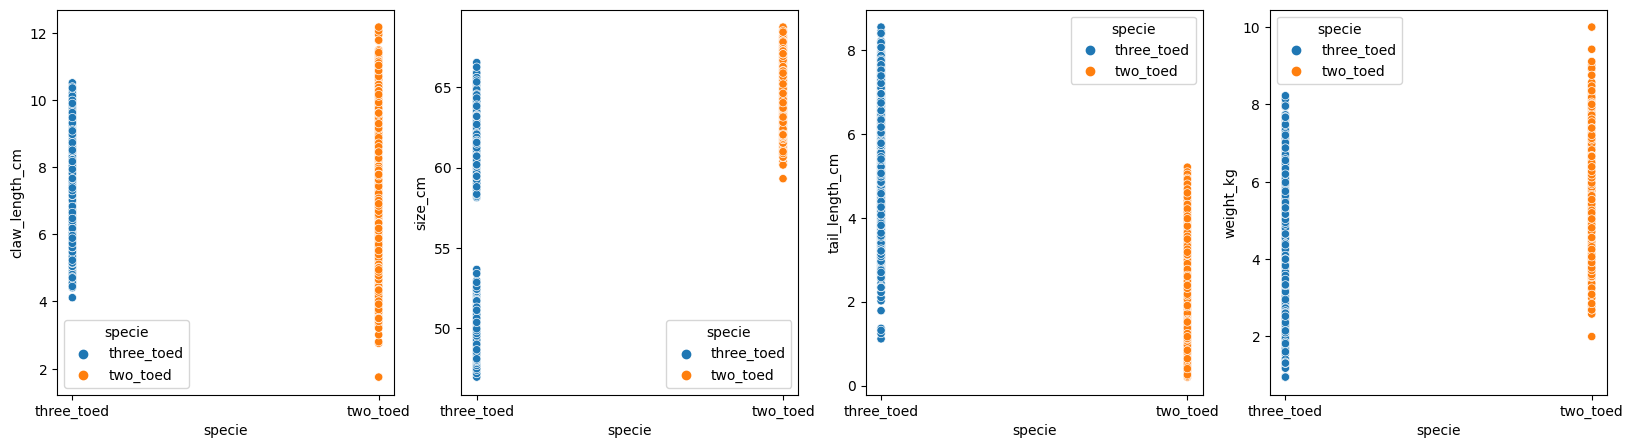

In [45]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (20,5))

i = 0
for names in numbercol_names:
    sns.scatterplot(data=df, x='specie', y=names, ax=axs[i], hue='specie')
    i+=1


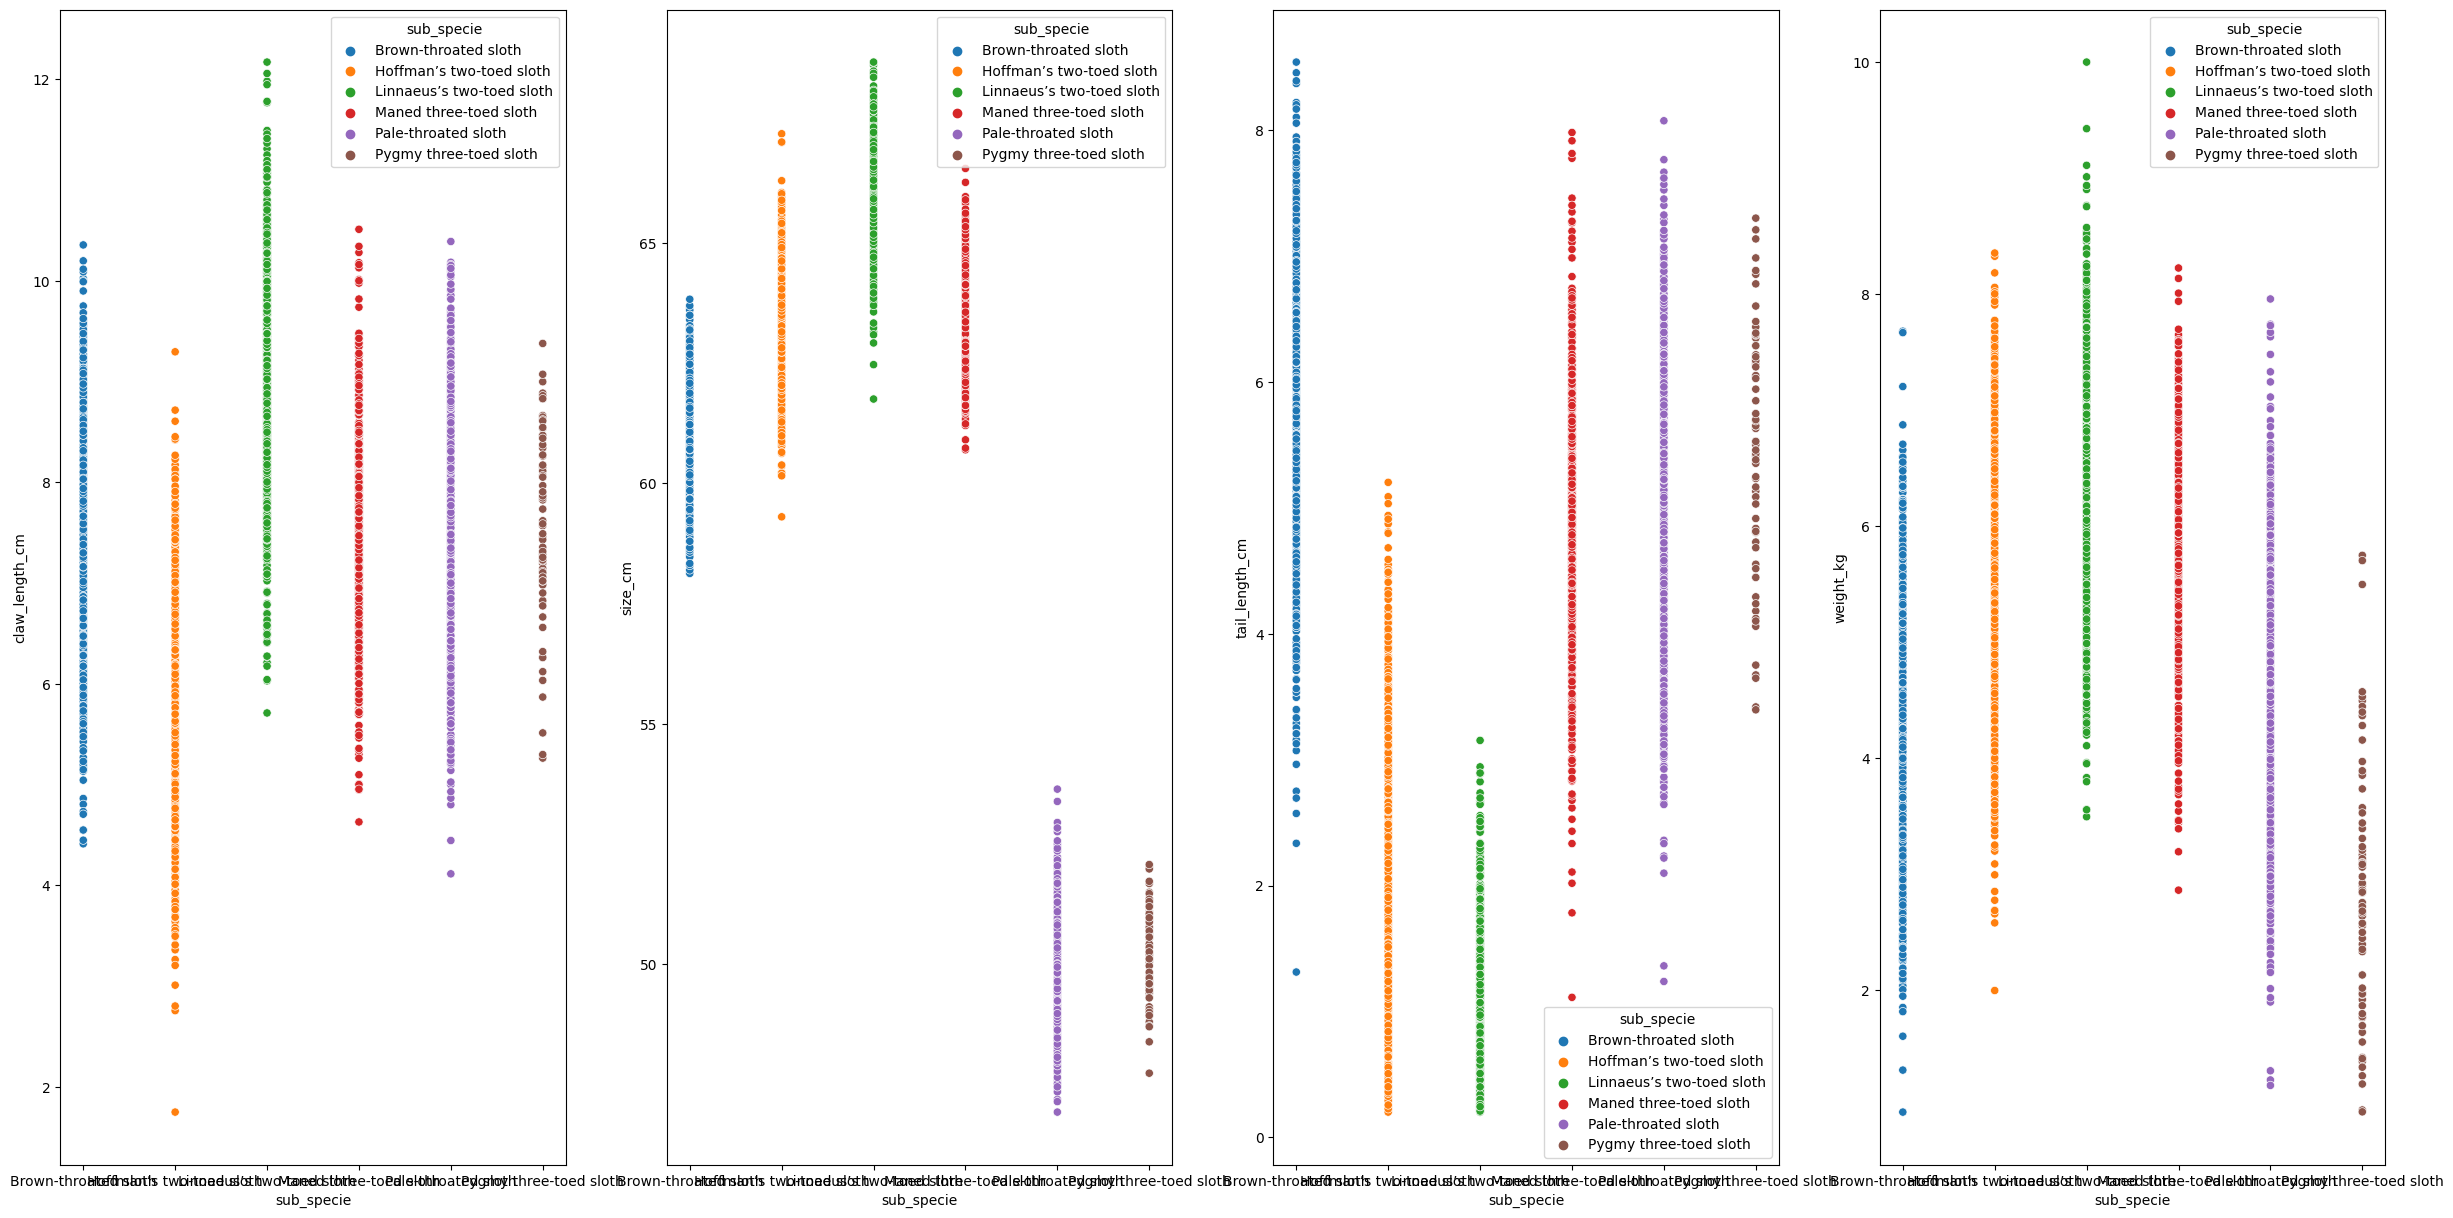

In [46]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (30,15))

i = 0
for names in numbercol_names:
    sns.scatterplot(data=df, x='sub_specie', y=names, ax=axs[i], hue='sub_specie')
    i+=1


Last, we can use the pairplot with a kernel density estimation, which shows a continous probability density curve. Around the small contours there is the biggest data concentration.
Also, it is possible to conditional the distribution by the categories 

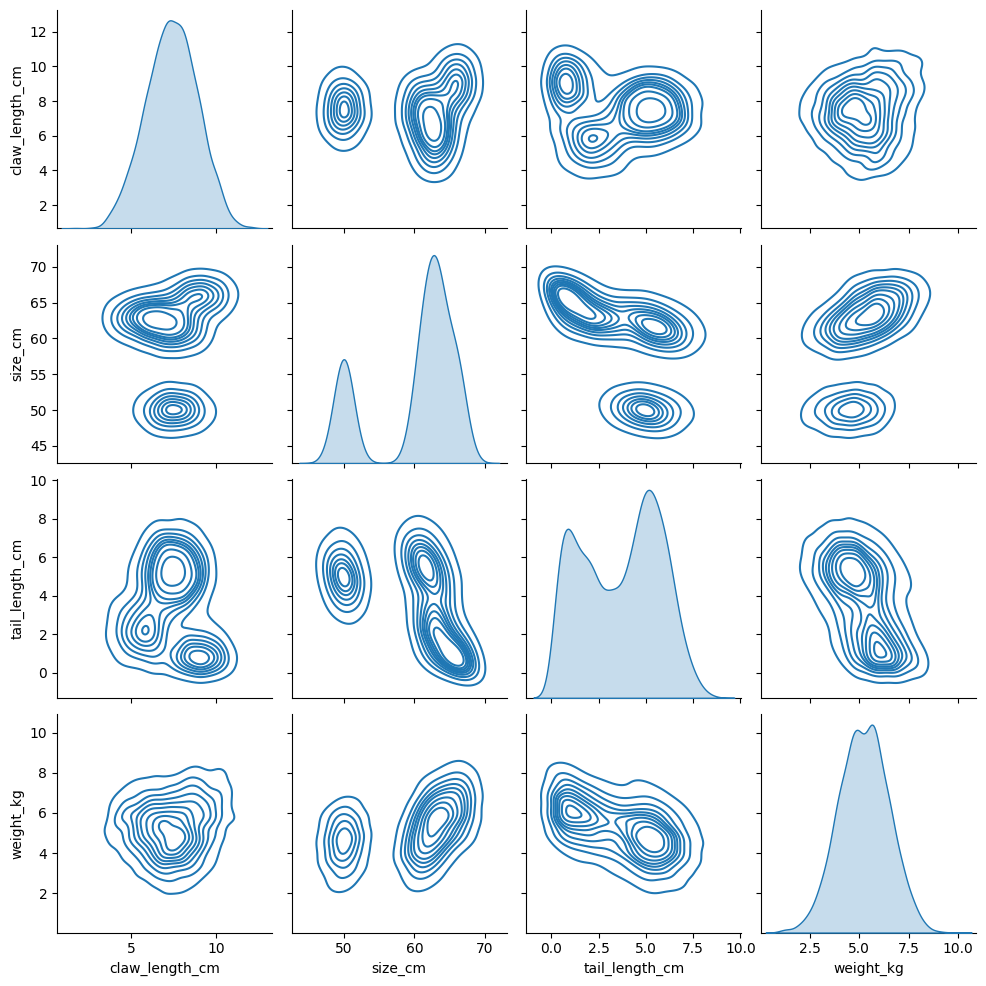

In [136]:
sns.pairplot(data=df, kind='kde')

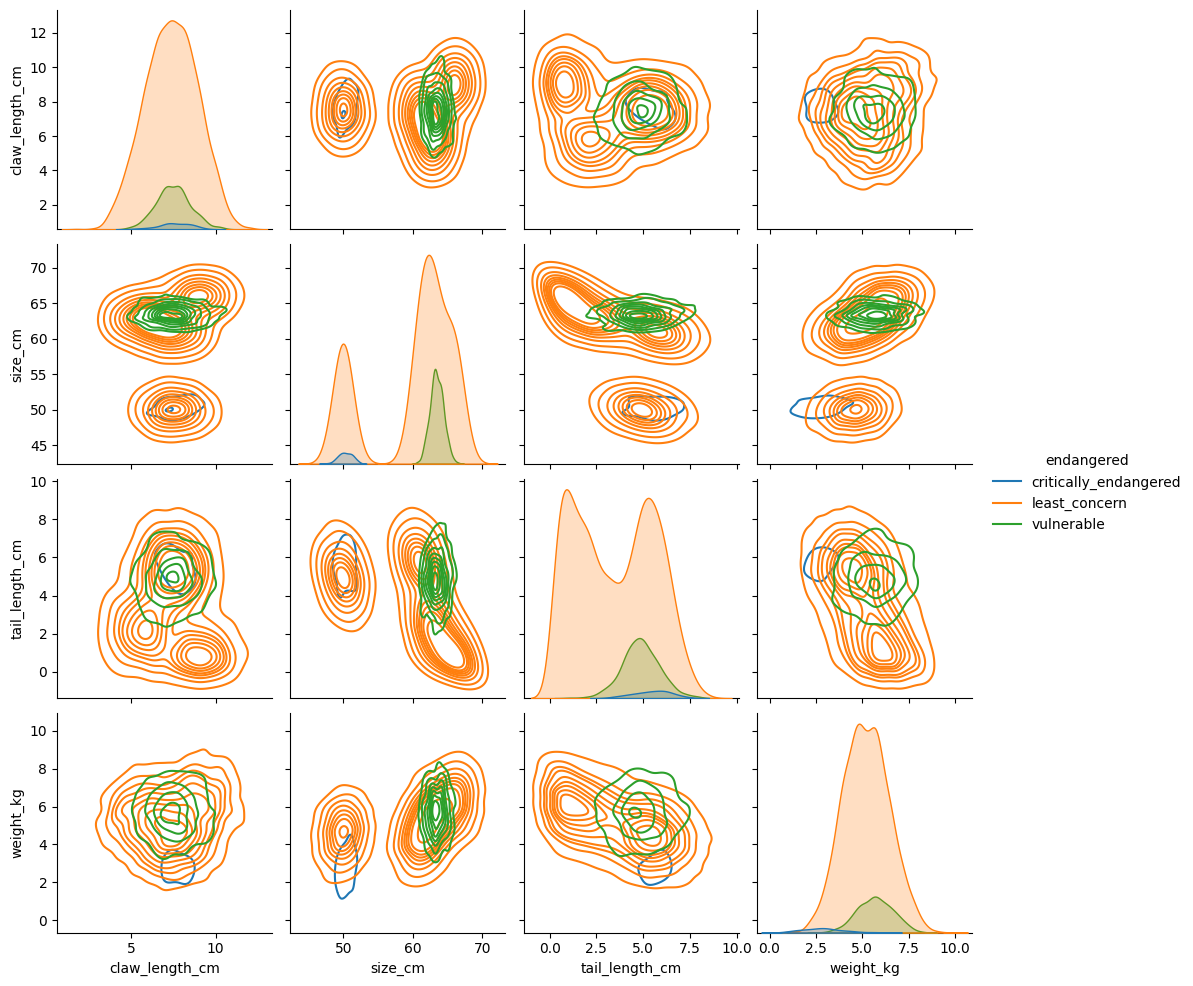

In [131]:
sns.pairplot(data =df, hue = 'endangered',kind='kde')

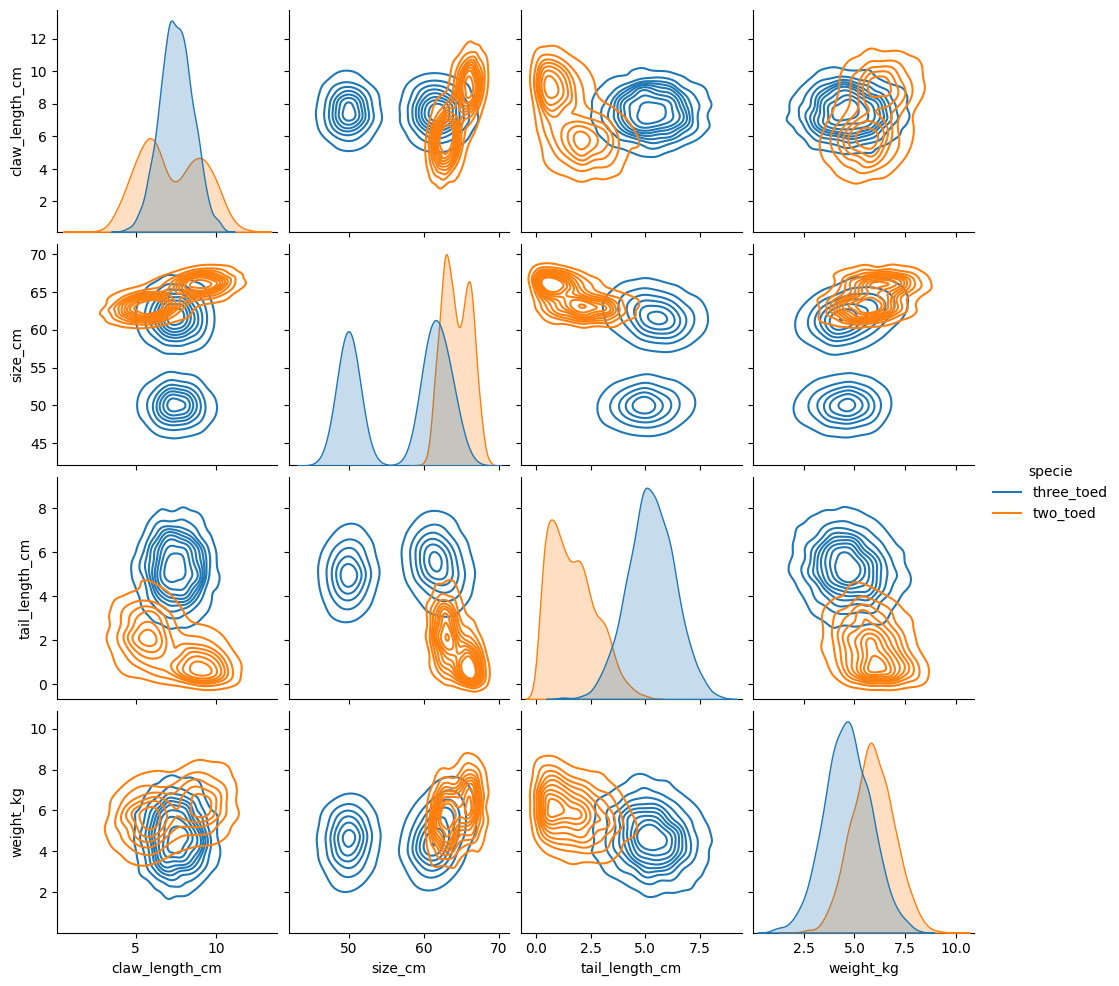

In [132]:
sns.pairplot(data =df, hue = 'specie',kind='kde')

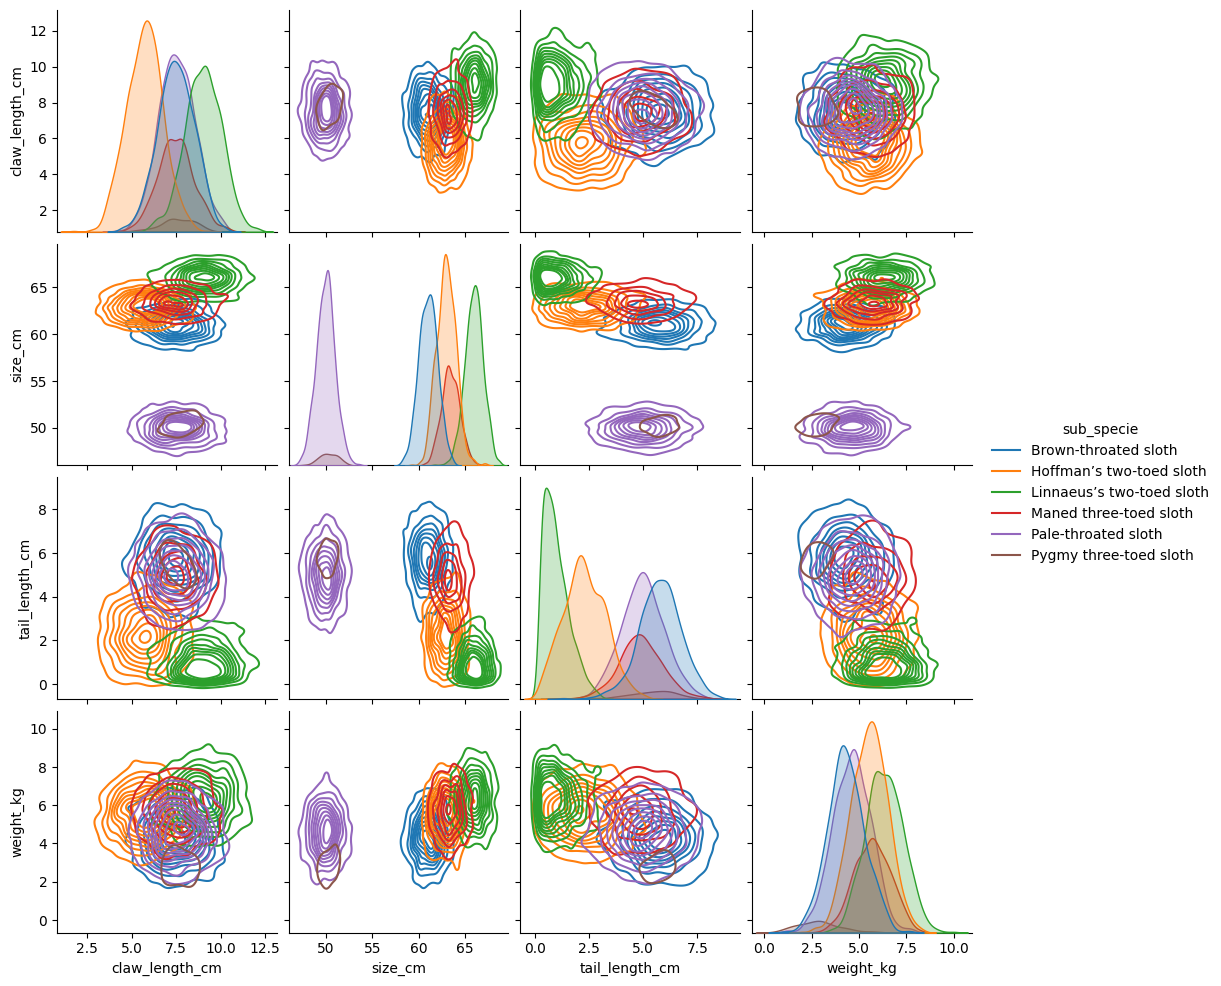

In [68]:
sns.pairplot(data =df, hue = 'sub_specie',kind='kde')

In [140]:
dummies_specie = pd.get_dummies(df['specie'],dtype='int')
dummies_specie

three_toed  two_toed
0              1         0
1              1         0
2              1         0
3              1         0
4              1         0
...          ...       ...
4811           0         1
4812           0         1
4813           0         1
4814           0         1
4815           0         1

[4816 rows x 2 columns]

In [141]:
X = df[['claw_length_cm','size_cm','tail_length_cm','weight_kg']]
y = dummies_specie['']

claw_length_cm  size_cm  tail_length_cm  weight_kg
0              6.825   52.004           4.448      3.570
1              8.260   50.082           6.286      2.844
2              8.662   51.498           4.551      1.259
3              8.467   50.122           6.983      2.392
4              7.104   51.364           5.411      3.163
...              ...      ...             ...        ...
4811           3.919   62.819           3.176      4.247
4812           5.881   63.150           1.535      4.056
4813           4.941   62.091           1.905      5.194
4814           6.176   62.039           1.164      5.035
4815           3.494   64.043           1.512      6.384

[4816 rows x 4 columns]